<a href="https://colab.research.google.com/github/solwinkel/Primer-parcial-analisis-predictivo/blob/main/Tp2Predictiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **82.05 - Análisis Predictivo**
Segundo Examen

Sol Winkel

[Dataset
](https://www.kaggle.com/competitions/analisis-predictivo-2023q1/data)

Variable target: review_scores_rating



# Importar el dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
import json
from google.colab import drive

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

drive.mount('/content/drive', force_remount=True)
with open("/content/drive/My Drive/kaggle.json", 'r') as f:
    api_token= json.load(f)

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c analisis-predictivo-2023q1

import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

Mounted at /content/drive
  0% 0.00/3.83M [00:00<?, ?B/s]
100% 3.83M/3.83M [00:00<00:00, 62.4MB/s]


In [3]:
import pandas as pd
df = pd.read_csv("base_train.csv", sep=",")
dfval = pd.read_csv("base_val.csv", sep=",")

# Análisis exploratorio (EDA)

**Se importan librerias que se utilizaran para el análisis**



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *  

**Cantidad de filas y columnas**

In [5]:
print('Cantidad de Filas y columnas:', df.shape)

Cantidad de Filas y columnas: (4928, 68)


**Visualizar la  base**

In [6]:
!pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from tabulate import tabulate
import pandas as pd

data = df.head(10).values.tolist()
headers = df.head(10).columns.tolist()
tabla = tabulate(data, headers, tablefmt="fancy_grid")
print(tabla)

╒════════╤═════════════════╤═══════════════════════════════════════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

In [8]:
import pandas as pd
from IPython.display import display

pd.set_option('display.max_columns', None)
display(df)


id           source  \
0                 528022      city scrape   
1                   2818      city scrape   
2                  20168  previous scrape   
3                  27886      city scrape   
4                  28871      city scrape   
...                  ...              ...   
4923  567407960487712181      city scrape   
4924  567829002669570759      city scrape   
4925  567927199868989828      city scrape   
4926  567958632398468204      city scrape   
4927  568514877303578111      city scrape   

                                                   name  \
0                                        Somewhere Else   
1             Quiet Garden View Room & Super Fast Wi-Fi   
2          Studio with private bathroom in the centre 1   
3     Romantic, stylish B&B houseboat in canal district   
4                               Comfortable double room   
...                                                 ...   
4923  Charming apartment in Oud-West, next to Vondel...   
4924                  Cosy 1 bedroom Apartment by Canal   
4925  Spacious private bedroom, living area and kitchen   
4926   ★ NEW ★ STYLISH ★ LOFT ★ AMSTERDAM CITY CENTRE ★   
4927   Gezellige familiewoning op loopafstand van metro   

                                            description  \
0     Highlights<br />*Located only 5 minutes from C...   
1     Quiet Garden View Room & Super Fast Wi-Fi<br /...   
2     17th century Dutch townhouse in the heart of t...   
3     Stylish and romantic houseboat on fantastic hi...   
4     <b>The space</b><br />In a monumental house ri...   
...                                                 ...   
4923  Charming renovated apartment with original 193...   
4924  The apartment has just been fully renovated an...   
4925  This 18 square meter bedroom is situated on th...   
4926  This stylish loft is located in Amsterdam Old-...   
4927  Moderne familie woning in een rustige woonwijk...   

                                  neighborhood_overview    host_id  host_name  \
0                                                   NaN    2594559        Els   
1     Indische Buurt ("Indies Neighborhood") is a ne...       3159     Daniel   
2     Located just in between famous central canals....      59484  Alexander   
3            Central, quiet, safe, clean and beautiful.      97647       Flip   
4          Flower market , Leidseplein , Rembrantsplein     124245      Edwin   
...                                                 ...        ...        ...   
4923                                                NaN   23030993        Tim   
4924                                                NaN   55892903    Martina   
4925                                                NaN  446310915       Kate   
4926  AMSTERDAM (OUD) WEST - (OLD) WEST<br /><br />W...  204029682     Dyllan   
4927  De woning ligt in de wijk Elzenhagen in Amster...   23704127   Brigitte   

      host_since           host_location  \
0     2012-06-10  Amsterdam, Netherlands   
1     2008-09-24  Amsterdam, Netherlands   
2     2009-12-02  Amsterdam, Netherlands   
3     2010-03-23  Amsterdam, Netherlands   
4     2010-05-13  Amsterdam, Netherlands   
...          ...                     ...   
4923  2014-10-27  Amsterdam, Netherlands   
4924  2016-01-24  Amsterdam, Netherlands   
4925  2022-02-22  Amsterdam, Netherlands   
4926  2018-07-21  Amsterdam, Netherlands   
4927  2014-11-13  Amsterdam, Netherlands   

                                             host_about  host_response_time  \
0                                                   NaN        within a day   
1     Upon arriving in Amsterdam, one can imagine as...      within an hour   
2                     + (Phone number hidden by Airbnb)      within an hour   
3     Marjan works in "eye" the dutch filmmuseum, an...      within an hour   
4                                                    Hi  within a few hours   
...                                                 ...                 ...   
4923  Af

In [9]:
for columna in df.columns:
    print("Datos en la columna", columna)
    print(df[columna].head())
    print("\n")

Datos en la columna id
0    528022
1      2818
2     20168
3     27886
4     28871
Name: id, dtype: int64


Datos en la columna source
0        city scrape
1        city scrape
2    previous scrape
3        city scrape
4        city scrape
Name: source, dtype: object


Datos en la columna name
0                                       Somewhere Else
1            Quiet Garden View Room & Super Fast Wi-Fi
2         Studio with private bathroom in the centre 1
3    Romantic, stylish B&B houseboat in canal district
4                              Comfortable double room
Name: name, dtype: object


Datos en la columna description
0    Highlights<br />*Located only 5 minutes from C...
1    Quiet Garden View Room & Super Fast Wi-Fi<br /...
2    17th century Dutch townhouse in the heart of t...
3    Stylish and romantic houseboat on fantastic hi...
4    <b>The space</b><br />In a monumental house ri...
Name: description, dtype: object


Datos en la columna neighborhood_overview
0                 

In [10]:
columnas = df.columns.tolist()
print(columnas)

['id', 'source', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first

**Datos duplicados**

In [11]:
df.duplicated().sum() 

0

In [12]:
if df['id'].nunique() == df['id'].count():
    print("Todos los valores en la columna son únicos")
else:
    print("La columna contiene valores duplicados")

Todos los valores en la columna son únicos


**Tipo de datos**

In [13]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [14]:
df.dtypes

id                                                int64
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
host_id                                           int64
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_neighbourhood                               object
host_listings_count                               int64
host_total_listings_count                         int64
host_verifications                              

**Valores nulos**

In [15]:
# Obtener la cantidad de valores nulos por columna
nulos_por_columna = [(columna, df[columna].isnull().sum()) for columna in df.columns]

# Ordenar la lista de columnas por la cantidad de valores nulos de mayor a menor
columnas_ordenadas = sorted(nulos_por_columna, key=lambda x: x[1], reverse=True)

# Imprimir la lista de columnas ordenadas
for columna, cantidad_nulos in columnas_ordenadas:
    print(f"La columna {columna} tiene {cantidad_nulos} valores nulos")


La columna neighbourhood_group_cleansed tiene 4928 valores nulos
La columna bathrooms tiene 4928 valores nulos
La columna calendar_updated tiene 4928 valores nulos
La columna host_neighbourhood tiene 2124 valores nulos
La columna host_about tiene 1746 valores nulos
La columna host_response_time tiene 1662 valores nulos
La columna host_response_rate tiene 1662 valores nulos
La columna neighborhood_overview tiene 1348 valores nulos
La columna neighbourhood tiene 1348 valores nulos
La columna host_acceptance_rate tiene 776 valores nulos
La columna host_location tiene 421 valores nulos
La columna bedrooms tiene 240 valores nulos
La columna license tiene 98 valores nulos
La columna beds tiene 70 valores nulos
La columna bathrooms_text tiene 9 valores nulos
La columna review_scores_accuracy tiene 4 valores nulos
La columna review_scores_cleanliness tiene 4 valores nulos
La columna review_scores_checkin tiene 4 valores nulos
La columna review_scores_communication tiene 4 valores nulos
La colu

In [16]:
for columna in df.columns:
    cantidad_nulos = df[columna].isnull().sum()
    print(f"La columna {columna} tiene {cantidad_nulos} valores nulos")

La columna id tiene 0 valores nulos
La columna source tiene 0 valores nulos
La columna name tiene 0 valores nulos
La columna description tiene 3 valores nulos
La columna neighborhood_overview tiene 1348 valores nulos
La columna host_id tiene 0 valores nulos
La columna host_name tiene 0 valores nulos
La columna host_since tiene 0 valores nulos
La columna host_location tiene 421 valores nulos
La columna host_about tiene 1746 valores nulos
La columna host_response_time tiene 1662 valores nulos
La columna host_response_rate tiene 1662 valores nulos
La columna host_acceptance_rate tiene 776 valores nulos
La columna host_is_superhost tiene 1 valores nulos
La columna host_neighbourhood tiene 2124 valores nulos
La columna host_listings_count tiene 0 valores nulos
La columna host_total_listings_count tiene 0 valores nulos
La columna host_verifications tiene 0 valores nulos
La columna host_has_profile_pic tiene 0 valores nulos
La columna host_identity_verified tiene 0 valores nulos
La columna ne

**Eliminar columnas**

Se eliminan las columnas: 'neighbourhoof_group_cleansed', 'bathrooms', 'calendar_updated' debido a que todos sus valores eran nulos


In [17]:
num_columnas_antes = len(df.columns)

columnas_a_eliminar = df.columns[df.isnull().all()]
print(columnas_a_eliminar)

df = df.dropna(axis=1, how='all')
num_columnas_despues = len(df.columns)

num_columnas_eliminadas = num_columnas_antes - num_columnas_despues
print(f"Se eliminaron {num_columnas_eliminadas} columnas")

Index(['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated'], dtype='object')
Se eliminaron 3 columnas


Se elimina columna host_name (nombres de dueños de alojamientos)

In [18]:
#probé realizar un análisis de sentimiento y no brinda 
#lo elimino porque considero que no aporta valor a la hora de predecir
df = df.drop('host_name', axis=1)

Se elimina columna host_since debido a que la información relevante que se obtiene de la misma es la antigüedad, información que se guarda en una nueva columna 

In [19]:
#Hago esto mismo mas abajo para poder generar la nueva columna
#df = df.drop('host_since', axis=1)

Se elimina columna host_neighbourhood (barrio del dueño) debido a que analizo con otra de las columnas si el dueño vive en Holanda o no, teniendo esta columna información repetida
 

In [20]:
df = df.drop('host_neighbourhood', axis=1)


Se elimina la columna neighbourhood (barrio del alojamiento) debido a que hay otra columna que indica zona del alojamiento (permitiendo categorizar ya que agrupa algunos barrios) 

In [21]:
valores_unicos = df['neighbourhood'].unique().tolist()
print(valores_unicos)
unique_values = df['neighbourhood'].nunique()
print(unique_values) #45

#al ser detallada de neighbourhood_cleansed, no la utilizo
df = df.drop('neighbourhood', axis=1)


[nan, 'Amsterdam, North Holland, Netherlands', 'Amsterdam, Noord-Holland, Netherlands', 'Amsterdam, NH, Netherlands', 'Watergraafsmeer, North Holland, Netherlands', 'Zeeburg, North Holland, Netherlands', 'Amsterdam-Zuidoost, North Holland, Netherlands', 'Amsterdam, SN, Netherlands', 'Amsterdam, Noord Holland, Netherlands', 'Amsterdam, Holland, Netherlands', 'Amsterdam Zuidoost, North Holland, Netherlands', 'Amsterdam, Netherlands', 'Amsterdam Zuid-Oost, Noord-Holland, Netherlands', 'Amsterdam, Emmy andriessestraat, Netherlands', 'Amsterdam, AH, Netherlands', 'Amsterdam, GA, Netherlands', 'Amsterdam, GD, Netherlands', 'Amsterdam, Amstel, Netherlands', 'Amsterdam-Zuidoost, Noord-Holland, Netherlands', 'Amsterdam , 2 de Egelantiersdwarsstraat 13 III, Netherlands', 'Amsterdam, VX, Netherlands', 'Amsterdam, DP, Netherlands', 'Amsterdam , Noord-Holland, Netherlands', 'Amsterdam, Frederiksstraat, Netherlands', 'Amsterdam , North Holland, Netherlands', 'Duivendrecht, Noord-Holland, Netherlands

Se elimina la columna property_time (cada dueño elige que clasificación ponerle respecto al tipo de alojamiento) ya que se utiliza la columna room_type de la que se obtiene la misma información pero con menos opciones lo que hace que todos los alojamientos queden dentro de alguna categoría relevante

In [22]:
valores_unicos = df['property_type'].unique().tolist()
print(valores_unicos)
unique_values = df['property_type'].nunique()
print(unique_values) 

df = df.drop('property_type', axis=1)

['Private room in boat', 'Private room in rental unit', 'Private room in townhouse', 'Private room in houseboat', 'Entire rental unit', 'Entire guest suite', 'Private room in bed and breakfast', 'Private room in home', 'Entire guesthouse', 'Entire townhouse', 'Room in boutique hotel', 'Entire condo', 'Entire loft', 'Private room in guest suite', 'Entire home', 'Private room in loft', 'Boat', 'Private room in condo', 'Houseboat', 'Room in bed and breakfast', 'Shared room in home', 'Private room in guesthouse', 'Private room in farm stay', 'Private room in serviced apartment', 'Entire villa', 'Private room in villa', 'Private room in tiny home', 'Entire serviced apartment', 'Barn', 'Private room in bungalow', 'Shared room in rental unit', 'Entire cabin', 'Room in hotel', 'Entire place', 'Tiny home', 'Private room in cabin', 'Entire cottage', 'Entire chalet', 'Room in serviced apartment', 'Private room in earthen home', 'Tower', 'Private room', 'Shared room in houseboat', 'Room in hostel'

Se elimina columna license debido a que es la licencia del host. Me podría servir para analizar la cantidad de veces que se repite cada una y asi ver cuantos alojamentos tiene el host. Esa información ya esta en otra columna por lo que decido eliminarla

In [23]:
df = df.drop('license', axis=1)

**Análisis por columna**

Columna source (indica de donde se obtuvo la información)

In [24]:
valores_unicos = df['source'].unique().tolist()
print(valores_unicos)

df['source'] = df['source'].map({'city scrape': 0, 'previous scrape': 1})
#cambiar valores cityscrape por 0 y previous scrape por 1

['city scrape', 'previous scrape']


Columna name (indica el nombre del alojamiento)

In [25]:
valores_unicos = df['name'].unique().tolist()
print(valores_unicos)

#realizare un analisis de sentimiento para analizar los nombres 
from textblob import TextBlob

sentiment_scores = []
for value in df['name']:
    blob = TextBlob(str(value))
    sentiment_scores.append(blob.sentiment.polarity)

df['name'] = sentiment_scores

['Somewhere Else', 'Quiet Garden View Room & Super Fast Wi-Fi', 'Studio with private bathroom in the centre 1', 'Romantic, stylish B&B houseboat in canal district', 'Comfortable double room', 'Comfortable single room', 'Quiet 2-bedroom Amsterdam city centre apartment', 'Multatuli Luxury Guest Suite in top location', 'B & B de 9 Straatjes (city center)', 'Apartment near Museumplein (centre)', 'Charming, beautifully & sunny place', 'TOP LOCATED Canalhouse B&B Jordaan', 'The Backroom - Central private appt', 'Privat room and shared Houseboat "Ramona" centre', 'Beautiful and spacious room', 'Entire house with garden in De Pijp', 'Apartment 2 minutes from Centrum!', 'Modern app. with brand new design bathroom', 'SUPERLOCATED Room in  CANALHOUSE, Private bath', "Central,Rooftop 360',Zen,Canal-View, Bright,Quiet", 'Spacious apartment next to center', 'Authentic Amsterdam apartment RAI', 'Clean & Cozy room in The Baarsjes', 'Metropolitan B&B centre Amsterdam', 'Spacious apartment in De Pijp (n

Columna description (es una descripción del alojamiento)


In [26]:
print(df['description'][0])

print(df['description'].isnull().sum()) 
df['description'] = df['description'].fillna(0)

df['description'] = df['description'].astype(str)
df['description'] = df['description'].apply(len)

Highlights<br />*Located only 5 minutes from CITY CENTER <br />*Short distance from Central station<br />*Fast & Free WIFI<br />*DOUBLE bed <br />*Unique HOUSEBOAT<br /><br /><b>The space</b><br />"Somewhere Else" is a bed & breakfast on the beautiful old ship ‘Cornelia’, located in the 'Oude Houthaven'. In about 10 minutes walking distance form Central Station you will find this charming B&B. The private guest accommodation is in the old skipper’s quarters, with an entrance through the wheelhouse. On all sides there’s a wide view over the water, even from the toilet! This bed and breakfast reflects the ultimate Amsterdam experience. The friendly atmosphere in the area almost feels like a village. This property is situated in the Old Wood Harbour. And after only a short walk the Amsterdam Canals and the Jordaan will surround you.  From the first time you hop aboard the “Cornelia”, a houseboat steeped in history, and built in 1905, you will immediately feel relaxed and at home in the co

Columna neighborhood_overview (descripción de la zona del alojamiento)




In [27]:
cantidad_valores_unicos = df['neighborhood_overview'].nunique()
print(cantidad_valores_unicos) 

cantidad_nulos = df['neighborhood_overview'].isnull().sum()
print(cantidad_nulos) 

df['neighborhood_overview'] = df['neighborhood_overview'].fillna(0)

#para analizar la descripcion del barrio, realizaré un analisis de sentimiento
sentimientos = df['neighborhood_overview'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['neighborhood_overview'] = sentimientos

3280
1348


Columna host_id (id del dueño del alojamiento)

In [28]:
valores_unicos = df['host_id'].unique().tolist()
print(valores_unicos)
unique_values = df['host_id'].nunique()
print(unique_values) 

[2594559, 3159, 59484, 97647, 124245, 194779, 225987, 231946, 264178, 301340, 436145, 186729, 494281, 195859, 670266, 748161, 776296, 806976, 815989, 856540, 907405, 915591, 1100324, 1107389, 1135329, 1155595, 1005087, 1298735, 1322517, 1337537, 1344947, 1376607, 1435990, 1436134, 1451657, 1491565, 1511330, 276068, 1565319, 1141485, 176944339, 1600010, 1672823, 1687595, 1740785, 1775032, 1811745, 1849988, 1853421, 1855417, 1907015, 2008330, 2063261, 1336633, 2144360, 2064560, 2191136, 2193861, 2202945, 2238440, 2297302, 1382273, 2395278, 2449055, 2483843, 2536879, 2540480, 2541099, 2550339, 2569931, 6114964, 6211092, 6101182, 6127483, 6300541, 6302268, 5796250, 6299692, 5331982, 6368949, 6428213, 3136773, 6534317, 6536417, 6565457, 6673715, 6673713, 6449836, 5646154, 6739792, 6739095, 6338151, 6804135, 6863370, 6873206, 6900127, 2826060, 6925102, 2714856, 4615590, 3573065, 7113252, 7126883, 5720215, 7218607, 2968287, 7259166, 4905127, 6701188, 7358924, 7371529, 7403304, 7405524, 722099

Columna host since (indica fecha desde cuando es host el dueño)


In [29]:
#convierto en una columna que sea antiguedad para ver hace cuanto son host
df['host_since'] = pd.to_datetime(df['host_since'])

print('Fecha mínima:', df['host_since'].min())
print('Fecha máxima:', df['host_since'].max())

# se considera la antiguedad desde el 1.1.2023
from datetime import datetime
fecha_actual = datetime(2023, 1, 1)

df['antiguedad_host'] = (fecha_actual - df['host_since']) / pd.Timedelta(days=365)
df['antiguedad_host'][0]

df = df.drop('host_since', axis=1)

Fecha mínima: 2008-09-24 00:00:00
Fecha máxima: 2022-11-06 00:00:00


Columna host_location (indica el lugar donde vive el dueño)


In [30]:
valores_unicos = df['host_location'].unique().tolist()
print(valores_unicos)
unique_values = df['host_location'].nunique()
print(unique_values) 

df['host_location'] = df['host_location'].astype(str) 

#imputo nulos (los nulos los considero fuera de Holanda ya que al ser estar cerca una virtud, supongo que en ese caso lo aclararían)
df['host_location'] = df['host_location'].fillna(0)

#considero que si el host esta en Holanda, la puntuacion sera mejor debido a que se encuentra cerca para cualquier eventudalidad
def contains_netherlands(text):
    if "Netherlands" in text:
        return 1
    else: 
       return 0

df['host_location'] = df['host_location'].apply(contains_netherlands)

['Amsterdam, Netherlands', 'Netherlands', 'Nieuw Sloten, Netherlands', 'New York, NY', 'London, United Kingdom', 'De Pijp, Netherlands', 'La Cala de Mijas, Spain', 'Heerhugowaard, Netherlands', 'Haarlem, Netherlands', nan, 'Warmond, Netherlands', 'The Hague, Netherlands', 'Zandvoort, Netherlands', 'Harlingen, Netherlands', 'Berlin, Germany', 'Enkhuizen, Netherlands', 'Bentveld, Netherlands', 'Washington, DC', 'Hilversum, Netherlands', 'Nijmegen, Netherlands', 'Nieuwendam, Netherlands', 'Heemskerk, Netherlands', 'Chicago, IL', 'Brasov, Romania', 'Katwoude, Netherlands', 'Nederland, CO', 'Leusden, Netherlands', 'Nieuwegein, Netherlands', 'Amstelveen, Netherlands', 'Sydney, Australia', 'Paris, France', 'Vinkeveen, Netherlands', 'Bergen, Netherlands', 'Eemnes, Netherlands', 'Schoorl, Netherlands', 'Malaysia', 'İstanbul, Turkey', 'Bogotá, Colombia', 'Hamburg, Germany', 'Kraków, Poland', 'Ouderkerk aan de Amstel, Netherlands', 'Muiden, Netherlands', 'Wageningen, Netherlands', 'Milan, Italy',

Columna host_about (información del host)

In [31]:
df['host_about'] = df['host_about'].fillna(0)

#realizo análisis de sentimiento
sentiment_scores1 = []

for value in df['host_about']:
    blob = TextBlob(str(value))
    sentiment_scores1.append(blob.sentiment.polarity)

df['host_about'] = sentiment_scores1

Columna host_response_time (Tiempo de respuesta de dueño frente a consultas)


In [32]:
valores_unicos = df['host_response_time'].unique().tolist()
print(valores_unicos)
unique_values = df['host_response_time'].nunique()
print(unique_values) 

#puedo pasar a categorica, cuanto mas rapido, mas alto. Si no nay info, le pongo 0
#['within a day' =2 , 'within an hour' = 4, 'within a few hours' =3, nan = 0, 'a few days or more' =1]

diccionario = {'within a day': 2, 'within an hour': 4, 'within a few hours': 3, 'a few days or more': 1, np.nan: 0}
df['host_response_time'] = df['host_response_time'].map(diccionario)

['within a day', 'within an hour', 'within a few hours', nan, 'a few days or more']
4


Columna host_response_rate (Porcentajes de respuesta; ratio de tiempo de respuesta)


In [33]:
#al ser una caracteristica positiva que la tasa de contesación sea alta, asumo que quienes tienen ese valor nulo es porque no
#contestan o porque su tasa es muy baja
df['host_response_rate'] = df['host_response_rate'].fillna(0) #reemplazo por 0, los 1662 valores nulos

# Reemplazar el símbolo % y convertir a numérico
df['host_response_rate'] = df['host_response_rate'].astype(str)
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)


Columna host_acceptance_rate (Ratio de aceptaciones que realiza el dueño a reservas)


In [34]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(0) 

# Reemplazar el símbolo % y convertir a numérico
df['host_acceptance_rate'] = df['host_acceptance_rate'].astype(str)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)

Columna host_is_superhost (indica si es superhost o no)

In [35]:
df.dropna(subset=['host_is_superhost'], inplace=True)

#reemplazo true/false por 0 y 1
def bool_to_int(x):
    if x == 't':
        return 1
    else:
        return 0

df['host_is_superhost'] = df['host_is_superhost'].apply(bool_to_int)

Columna host_listings_count (indica el número de alojamiento en Airbnb que tiene el dueño)


In [36]:
df.dtypes['host_listings_count']

dtype('int64')

Columna host_total_listings_count (indica la cantidad de alojamientos en Airbnb que tiene el dueño)


In [37]:
df['host_total_listings_count']

0         1
1         1
2         5
3         1
4         2
5         2
6         1
7         2
8         2
9         1
10        1
11        4
12        2
13        1
14        2
15        3
16        2
17        1
18        4
19        1
20        1
21        2
22        3
23        1
24        2
25        1
26        2
27        1
28        3
29        1
30        1
31        1
32        3
33        3
34        1
35        1
36        1
37        2
38        2
39        1
40        1
41        2
42        3
43        2
44        3
45        3
46        1
47        6
48        1
49        3
50        3
51        1
52        2
53        1
54        1
55        4
56        1
57        2
58        1
59        1
60        4
61        1
62        1
63        3
64        4
65        3
66        1
67        2
68        1
69        3
70        1
71        1
72        1
73        1
74        1
75        5
76        1
77        1
78        2
79        1
80        4
81        2
82        1
83  

In [38]:
#Verificar si los valores de host_listing_count son menores a los valores de la host_total_listing_count
son_iguales = (df['host_listings_count'] <= df['host_total_listings_count']).all()

if son_iguales:
    print("Los valores de host_listings_count son menores a los valores de host_total_listings_count")
else:
    print("Los valores de host_listings_count no son menores a los valores de host_total_listings_count")

Los valores de host_listings_count son menores a los valores de host_total_listings_count


Columna host_verifications (Características verificadas del dueño, es una lista con parámetros)


In [39]:
valores_unicos = df['host_verifications'].unique().tolist()
print(valores_unicos)
unique_values = df['host_verifications'].nunique()
print(unique_values) 

def count_comma_words(text):
    return len(text.split(','))

df['host_verifications'] = df['host_verifications'].apply(count_comma_words)


["['email', 'phone']", "['email', 'phone', 'work_email']", "['phone']", "['phone', 'work_email']", "['email']", '[]']
6


Columna host_has_profile_pic (indica si el dueño tiene foto de perfil o no) 


In [40]:
def bool_to_int(x):
    if x == 't':
        return 1
    else:
        return 0

df['host_has_profile_pic'] = df['host_has_profile_pic'].apply(bool_to_int)

Columna host_identity_verified (indica si el dueño tiene la identidad verificada)


In [41]:
def bool_to_int(x):
    if x == 't':
        return 1
    else:
        return 0

df['host_identity_verified'] = df['host_identity_verified'].apply(bool_to_int)

Columna neighbourhood_cleansed (zona del alojamiento)


In [42]:
valores_unicos = df['neighbourhood_cleansed'].unique().tolist()
print(valores_unicos)
unique_values = df['neighbourhood_cleansed'].nunique()
print(unique_values) 

#armo diccionario para crear los 22 valores numericos
mapeo = {
    'Westerpark': 1,
    'Oostelijk Havengebied - Indische Buurt': 2,
    'Centrum-Oost': 3,
    'Centrum-West': 4,
    'Zuid': 5,
    'Oud-Oost': 6,
    'De Pijp - Rivierenbuurt': 7,
    'Slotervaart': 8,
    'De Baarsjes - Oud-West': 9,
    'Bos en Lommer': 10,
    'IJburg - Zeeburgereiland': 11,
    'Watergraafsmeer': 12,
    'Noord-Oost': 13,
    'Bijlmer-Centrum': 14,
    'Oud-Noord': 15,
    'Noord-West': 16,
    'De Aker - Nieuw Sloten': 17,
    'Geuzenveld - Slotermeer': 18,
    'Osdorp': 19,
    'Gaasperdam - Driemond': 20,
    'Bijlmer-Oost': 21,
    'Buitenveldert - Zuidas': 22
}

df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].map(mapeo)

['Westerpark', 'Oostelijk Havengebied - Indische Buurt', 'Centrum-Oost', 'Centrum-West', 'Zuid', 'Oud-Oost', 'De Pijp - Rivierenbuurt', 'Slotervaart', 'De Baarsjes - Oud-West', 'Bos en Lommer', 'IJburg - Zeeburgereiland', 'Watergraafsmeer', 'Noord-Oost', 'Bijlmer-Centrum', 'Oud-Noord', 'Noord-West', 'De Aker - Nieuw Sloten', 'Geuzenveld - Slotermeer', 'Osdorp', 'Gaasperdam - Driemond', 'Bijlmer-Oost', 'Buitenveldert - Zuidas']
22


Columnas latitud y longitud

In [43]:
#armo un gráfico para revisar que todos esten ubicados dentro de amsterdam

import folium
mapa = folium.Map(location=[52.37403, 4.88969], zoom_start=12)

for index, row in df.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    folium.Marker(location=[lat, lon]).add_to(mapa)
display(mapa)

Columna room_type (indica la clasifiación del alojamiento)

In [44]:
valores_unicos = df['room_type'].unique().tolist()
print(valores_unicos) #['Private room', 'Entire home/apt', 'Hotel room', 'Shared room']
unique_values = df['room_type'].nunique()
print(unique_values) 

diccionario = {'Private room': 2, 'Entire home/apt': 4, 'Hotel room': 3, 'Shared room': 1}
df['room_type'] = df['room_type'].map(diccionario)

['Private room', 'Entire home/apt', 'Hotel room', 'Shared room']
4


Columna accomodates 

In [45]:
valores_unicos = df['accommodates'].unique().tolist()
print(valores_unicos) 
unique_values = df['accommodates'].nunique()
print(unique_values) 

[2, 1, 4, 3, 12, 16, 5, 6, 7, 14, 8, 10, 13, 9]
14


Columna bathrooms_text

In [46]:
valores_unicos = df['bathrooms_text'].unique().tolist()
print(valores_unicos) 
unique_values = df['bathrooms_text'].nunique()
print(unique_values) 

bathrooms_mode = df['bathrooms_text'].mode()[0]
df['bathrooms_text'] = df['bathrooms_text'].fillna(bathrooms_mode) 

#en una columna separo en privado y compartido (sin importar la cantidad) (1 es privado, 2 compartido)
#asumo que bath que no aclara es privado

import re
terminos_1 = ['shared baths', 'shared bath', 'shared half-bath']
regex_terminos_1 = r'\b({})\b'.format('|'.join(map(re.escape, terminos_1)))

df['bathrooms_text'] = np.where(df['bathrooms_text'].str.lower().str.strip().str.contains(regex_terminos_1), 2, 1)

['1.5 baths', '1.5 shared baths', '1 private bath', '1 shared bath', '1 bath', '2.5 baths', '3.5 baths', '0 baths', 'Private half-bath', '2 baths', '3 baths', '0 shared baths', 'Half-bath', nan, '5 baths', 'Shared half-bath', '2 shared baths', '5.5 baths', '4 baths', '4.5 baths']
19


<ipython-input-46-bfd8b6b6beec>:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['bathrooms_text'] = np.where(df['bathrooms_text'].str.lower().str.strip().str.contains(regex_terminos_1), 2, 1)


Columna bedrooms

In [47]:
valores_unicos = df['bedrooms'].unique().tolist()
print(valores_unicos) 
unique_values = df['bedrooms'].nunique()
print(unique_values) 

bedrooms_mode = df['bedrooms'].mode()[0] 
df['bedrooms'] = df['bedrooms'].fillna(bedrooms_mode) 

[1.0, 2.0, nan, 4.0, 3.0, 5.0, 10.0, 6.0, 8.0, 7.0]
9


Columna beds

In [48]:
valores_unicos = df['beds'].unique().tolist()
print(valores_unicos) 
unique_values = df['beds'].nunique()
print(unique_values) 

beds_mode = df['beds'].mode()[0] 
df['beds'] = df['beds'].fillna(beds_mode) 

[1.0, 2.0, 4.0, 3.0, 12.0, 26.0, 6.0, 5.0, nan, 7.0, 8.0, 14.0, 16.0, 20.0, 18.0, 17.0, 13.0, 10.0, 9.0, 33.0, 11.0, 24.0]
21


Columna amenities (contiene lista de amenities)

In [49]:
#creo columna que cuenta cantidad de amenities 
def count_comma_words(text):
    return len(text.split(','))

df['amenities'] = df['amenities'].apply(count_comma_words)

Columna price (precio por noche del alojamiento)

In [50]:
df.dtypes['price']
df['price'] = df['price'].astype(str)

df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')

df['price'] = pd.to_numeric(df['price'])

<ipython-input-50-58ea4a49e53d>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')


Columna minimum_nights

In [51]:
df.dtypes['minimum_nights']

dtype('int64')

Columna maximum_nights

In [52]:
df.dtypes['maximum_nights']

dtype('int64')

Columna minimum_minimum_nights

In [53]:
df.dtypes['minimum_minimum_nights']

dtype('int64')

Columna maximum_minimum_nights

In [54]:
df.dtypes['maximum_minimum_nights']

dtype('int64')

Columna minimum_maximum_nights

In [55]:
df.dtypes['minimum_maximum_nights']

dtype('int64')

Columna maximum_maximum_nights

In [56]:
df.dtypes['maximum_maximum_nights']

dtype('int64')

Columna minimum_nights_avg_ntm

In [57]:
df.dtypes['minimum_nights_avg_ntm']

dtype('float64')

Columna maximum_nights_avg_ntm

In [58]:
df.dtypes['minimum_nights_avg_ntm']

dtype('float64')

Columna has_availability (indica si tiene disponibilidad o no)

In [59]:
df.dtypes['has_availability']
def bool_to_int(x):
    if x == 't':
        return 1
    else:
        return 0

df['has_availability'] = df['has_availability'].apply(bool_to_int)

Columna availability_30

In [60]:
df.dtypes['availability_30']

dtype('int64')

Columna availability_60

In [61]:
df.dtypes['availability_60']

dtype('int64')

Columna availability_90

In [62]:
df.dtypes['availability_90']

dtype('int64')

Columna availability_365

In [63]:
df.dtypes['availability_365']

dtype('int64')

Columna calendar_last_scraped

In [64]:
df.dtypes['calendar_last_scraped']

valores_unicos = df['calendar_last_scraped'].unique().tolist()
print(valores_unicos) 
unique_values = df['calendar_last_scraped'].nunique()
print(unique_values) 

def convertir_valores(valor):
    if valor == '2022-12-05':
        return "1"
    elif valor == '2022-12-17':
        return "2"

df['calendar_last_scraped'] = df['calendar_last_scraped'].apply(convertir_valores)
df['calendar_last_scraped'] = df['calendar_last_scraped'].astype(int)

['2022-12-05', '2022-12-17']
2


Columna number_of_reviews (indica cantidad de reviews)

In [65]:
df.dtypes['number_of_reviews']

dtype('int64')

Columna number_of_reviews_ltm

In [66]:
df.dtypes['number_of_reviews_ltm']

dtype('int64')

Columna number_of_reviews_l30d

In [67]:
df.dtypes['number_of_reviews_l30d']

dtype('int64')

Columna first_review

In [68]:
df.dtypes['first_review']

valores_unicos = df['first_review'].unique().tolist()
print(valores_unicos) 
unique_values = df['first_review'].nunique()
print(unique_values) 

from datetime import datetime
df['first_review'] = pd.to_datetime(df['first_review'])

['2016-10-06', '2009-03-30', '2010-03-02', '2012-01-09', '2010-08-22', '2011-03-16', '2010-09-16', '2010-10-29', '2011-01-04', '2011-01-03', '2011-03-23', '2011-06-18', '2011-07-26', '2011-07-08', '2012-01-03', '2011-09-27', '2013-01-22', '2011-09-28', '2011-09-15', '2011-07-18', '2011-09-11', '2011-08-24', '2011-09-17', '2011-09-13', '2011-11-07', '2012-07-31', '2011-10-17', '2012-04-29', '2011-11-17', '2013-05-14', '2012-04-28', '2012-04-11', '2012-01-02', '2012-05-01', '2012-04-12', '2012-02-01', '2012-02-20', '2012-03-22', '2012-02-17', '2012-09-14', '2012-09-10', '2013-04-02', '2014-03-25', '2012-03-12', '2013-10-21', '2012-05-02', '2015-07-29', '2012-04-10', '2015-07-18', '2012-03-25', '2012-05-20', '2012-07-13', '2015-08-03', '2012-05-21', '2012-09-17', '2012-05-24', '2012-08-04', '2012-05-14', '2012-10-10', '2012-10-02', '2015-05-05', '2014-01-03', '2016-10-21', '2012-08-12', '2013-08-20', '2013-07-27', '2018-07-26', '2012-07-09', '2012-06-18', '2013-06-11', '2016-03-22', '2013

In [69]:
df['first_review'] = df['first_review'].dt.year.astype(int)  # Extraer el año y convertirlo a entero

Columna last_review

In [70]:
df.dtypes['last_review']
unique_values = df['last_review'].nunique()
print(unique_values) 

from datetime import datetime
df['last_review'] = pd.to_datetime(df['last_review'])

870


In [71]:
df['last_review'] = df['last_review'].dt.year.astype(int)  # Extraer el año y convertirlo a entero

Columna review_scores_accuracy

In [72]:
filas_con_nulos = df.loc[df['review_scores_accuracy'].isnull()]
hay_nulos_en_otros_campos = filas_con_nulos[['review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location']].isnull().any(axis=1)

print(sum(hay_nulos_en_otros_campos))

#debido a que son los mismos, elimino las 4 filas
df.dropna(subset=['review_scores_accuracy'], inplace=True)

4


Columna review_scores_cleanliness

In [73]:
df.dtypes['review_scores_cleanliness']

dtype('float64')

Columna review_scores_checkin

In [74]:
df.dtypes['review_scores_checkin']

dtype('float64')

Columna review_scores_communication

In [75]:
df.dtypes['review_scores_communication']

dtype('float64')

Columna review_scores_location

In [76]:
df.dtypes['review_scores_location']

dtype('float64')

Columna review_scores_value

In [77]:
df.dtypes['review_scores_value']

dtype('float64')

Columna instant_bookable (indica si el alojamiento puede alquilarse en el momento o requiere de aprobación)

In [78]:
df.dtypes['instant_bookable']
valores_unicos = df['instant_bookable'].unique().tolist()
print(valores_unicos) 
unique_values = df['instant_bookable'].nunique()
print(unique_values) 

def bool_to_int(x):
    if x == 't':
        return 1
    else:
        return 0
df['instant_bookable'] = df['instant_bookable'].apply(bool_to_int)

['f', 't']
2


Columna calculated_host_listings_count

In [79]:
df.dtypes['calculated_host_listings_count']

dtype('int64')

Columna calculated_host_listings_count_entire_homes

In [80]:
df.dtypes['calculated_host_listings_count_entire_homes']

dtype('int64')

Columna calculated_host_listings_count_private_rooms

In [81]:
df.dtypes['calculated_host_listings_count_private_rooms']

dtype('int64')

Columna calculated_host_listings_count_shared_rooms

In [82]:
df.dtypes['calculated_host_listings_count_shared_rooms']

dtype('int64')

Columna reviews_per_month

In [83]:
df.dtypes['reviews_per_month']

dtype('float64')

Chequeo los tipos de datos luego de la tranformación realizada

In [84]:
df.dtypes

id                                                int64
source                                            int64
name                                            float64
description                                       int64
neighborhood_overview                           float64
host_id                                           int64
host_location                                     int64
host_about                                      float64
host_response_time                                int64
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                 int64
host_listings_count                               int64
host_total_listings_count                         int64
host_verifications                                int64
host_has_profile_pic                              int64
host_identity_verified                            int64
neighbourhood_cleansed                          

Chequeo la cantidad de nulos en cada una de las columnas

In [85]:
null_counts = df.isnull().sum()
for column, count in null_counts.iteritems():
    print(f"Columna: {column}, Cantidad de nulos: {count}")

Columna: id, Cantidad de nulos: 0
Columna: source, Cantidad de nulos: 0
Columna: name, Cantidad de nulos: 0
Columna: description, Cantidad de nulos: 0
Columna: neighborhood_overview, Cantidad de nulos: 0
Columna: host_id, Cantidad de nulos: 0
Columna: host_location, Cantidad de nulos: 0
Columna: host_about, Cantidad de nulos: 0
Columna: host_response_time, Cantidad de nulos: 0
Columna: host_response_rate, Cantidad de nulos: 0
Columna: host_acceptance_rate, Cantidad de nulos: 0
Columna: host_is_superhost, Cantidad de nulos: 0
Columna: host_listings_count, Cantidad de nulos: 0
Columna: host_total_listings_count, Cantidad de nulos: 0
Columna: host_verifications, Cantidad de nulos: 0
Columna: host_has_profile_pic, Cantidad de nulos: 0
Columna: host_identity_verified, Cantidad de nulos: 0
Columna: neighbourhood_cleansed, Cantidad de nulos: 0
Columna: latitude, Cantidad de nulos: 0
Columna: longitude, Cantidad de nulos: 0
Columna: room_type, Cantidad de nulos: 0
Columna: accommodates, Cantid

<ipython-input-85-db334d301243>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, count in null_counts.iteritems():


# Descripción estadística

Distribución de la variable target

<ipython-input-87-71ff1238ca51>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df.review_scores_rating,kde_kws=dict(bw=0.2))
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


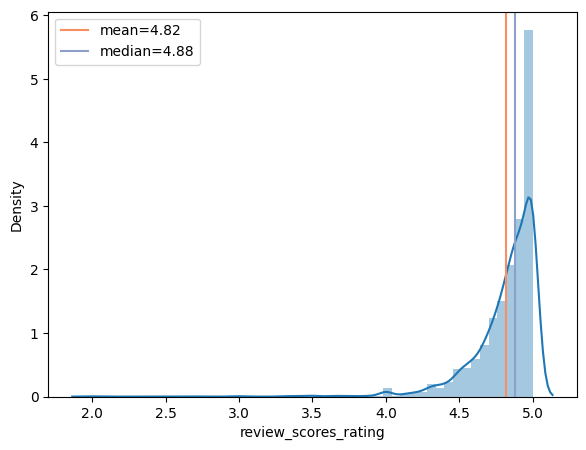

In [87]:
ratings = dict(mean=df.review_scores_rating.mean(),
              median=df.review_scores_rating.median())

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1 = sns.distplot(df.review_scores_rating,kde_kws=dict(bw=0.2))
ax1.axvline(x=ratings["mean"],c=sns.color_palette("Set2")[1],label=f"mean={round(ratings['mean'],2)}")
ax1.axvline(x=ratings["median"],c=sns.color_palette("Set2")[2],label=f"median={round(ratings['median'],2)}")
plt.legend()

In [88]:
df.describe()

id       source         name  description  \
count  4.923000e+03  4923.000000  4923.000000  4923.000000   
mean   6.300882e+15     0.382693     0.201648   826.518992   
std    5.876092e+16     0.486094     0.279392   254.803307   
min    2.818000e+03     0.000000    -0.750000     1.000000   
25%    1.133257e+07     0.000000     0.000000   664.000000   
50%    2.438367e+07     0.000000     0.066667  1000.000000   
75%    4.038853e+07     1.000000     0.400000  1000.000000   
max    5.685149e+17     1.000000     1.000000  1000.000000   

       neighborhood_overview       host_id  host_location   host_about  \
count            4923.000000  4.923000e+03    4923.000000  4923.000000   
mean                0.169137  8.179896e+07       0.898639     0.178332   
std                 0.176539  1.114373e+08       0.301837     0.212171   
min                -0.500000  3.159000e+03       0.000000    -0.800000   
25%                 0.000000  8.691967e+06       1.000000     0.000000   
50%                 0.155000  2.735689e+07       1.000000     0.100000   
75%                 0.292975  1.055020e+08       1.000000     0.333333   
max                 1.000000  4.865512e+08       1.000000     1.000000   

       host_response_time  host_response_rate  host_acceptance_rate  \
count         4923.000000         4923.000000           4923.000000   
mean             2.226082           63.014016             67.851107   
std              1.731779           46.459509             38.084088   
min              0.000000            0.000000              0.000000   
25%              0.000000            0.000000             41.000000   
50%              3.000000          100.000000             87.000000   
75%              4.000000          100.000000            100.000000   
max              4.000000          100.000000            100.000000   

       host_is_superhost  host_listings_count  host_total_listings_count  \
count        4923.000000          4923.000000                4923.000000   
mean            0.237457             2.509039                   4.770668   
std             0.425568            10.570811                  28.595094   
min             0.000000             1.000000                   1.000000   
25%             0.000000             1.000000                   1.000000   
50%             0.000000             1.000000                   1.000000   
75%             0.000000             2.000000                   3.000000   
max             1.000000           363.000000                 673.000000   

       host_verifications  host_has_profile_pic  host_identity_verified  \
count         4923.000000           4923.000000             4923.000000   
mean             2.077798              0.998375                0.860857   
std              0.420716              0.040283                0.346131   
min              1.000000              0.000000                0.000000   
25%              2.000000              1.000000                1.000000   
50%              2.000000              1.000000                1.000000   
75%              2.000000              1.000000                1.000000   
max              3.000000              1.000000                1.000000   

       neighbourhood_cleansed     latitude    longitude    room_type  \
count             4923.000000  4923.000000  4923.000000  4923.000000   
mean                 7.362381    52.367311     4.890935     3.360756   
std                  4.672742     0.016861     0.035772     0.938942   
min                  1.000000    52.290340     4.755710     1.000000   
25%                  4.000000    52.356670     4.868060     2.000000   
50%                  7.000000    52.366650     4.888390     4.000000   
75%                  9.000000    52.377010     4.908525     4.000000   
max                 22.000000    52.425120     5.026430     4.000000   

       accommodates  bathrooms_text     bedrooms         beds    amenities  \
count   4923.000000     4923.000000  4923.000000  4923.000000  

**Outliers**

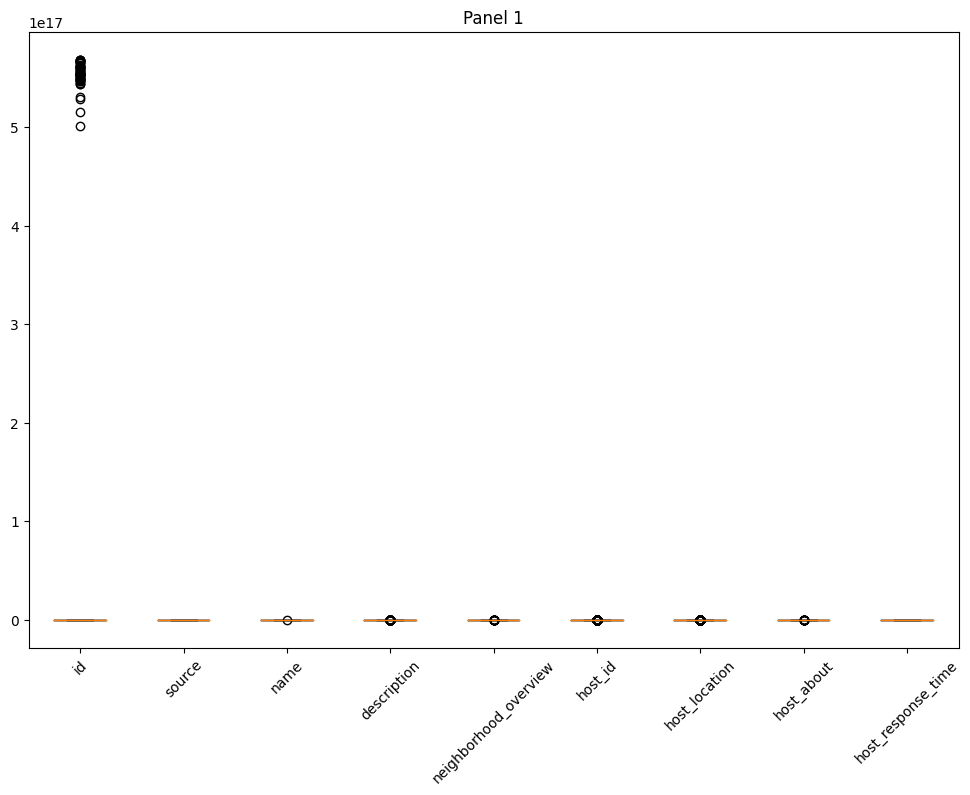

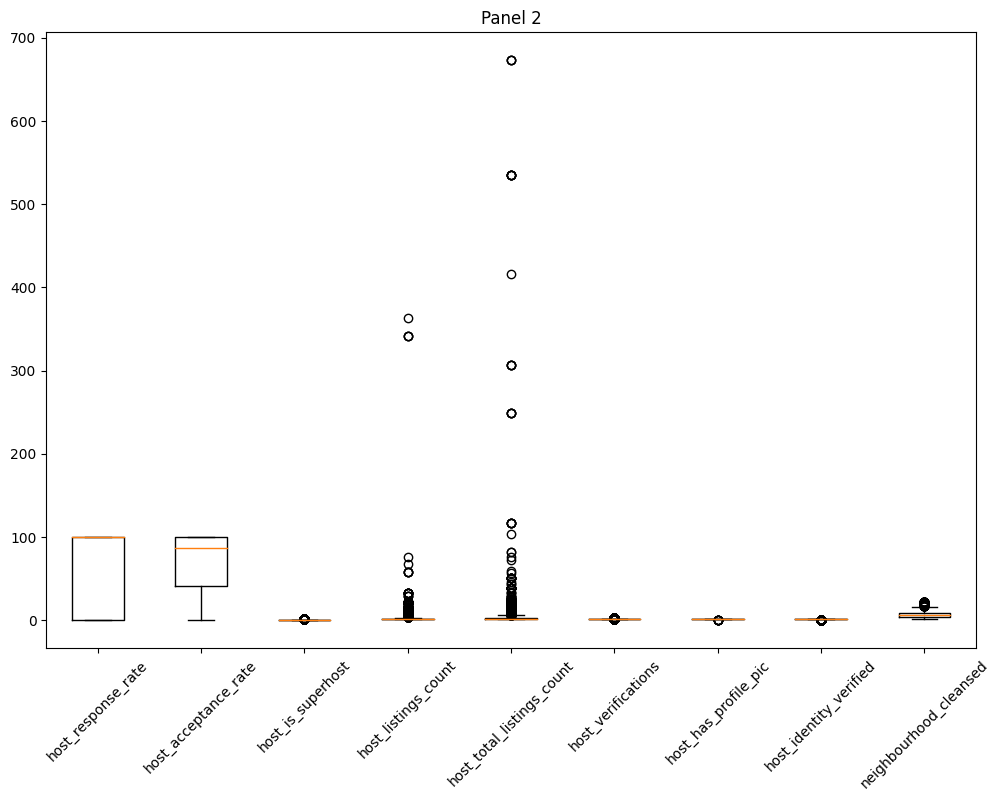

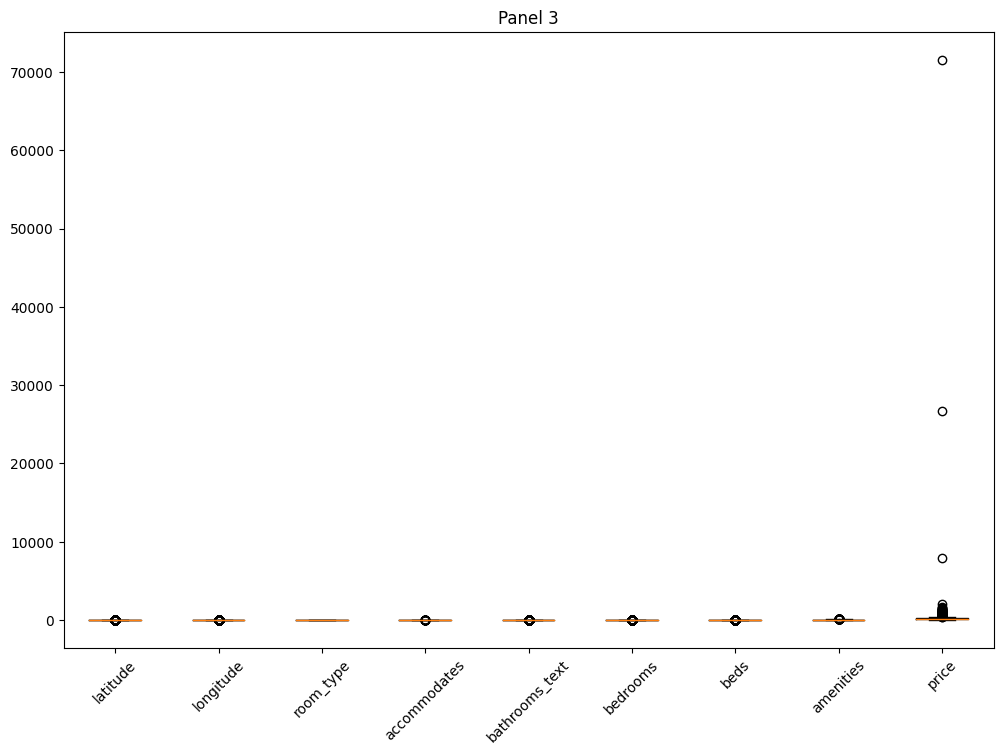

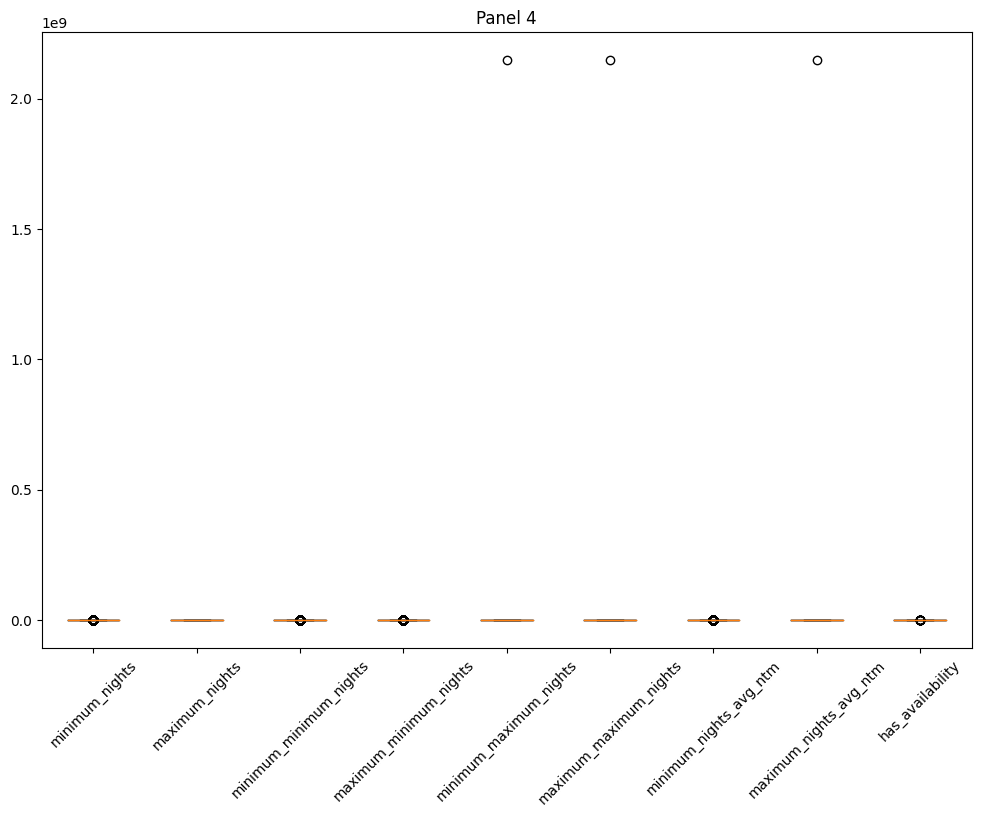

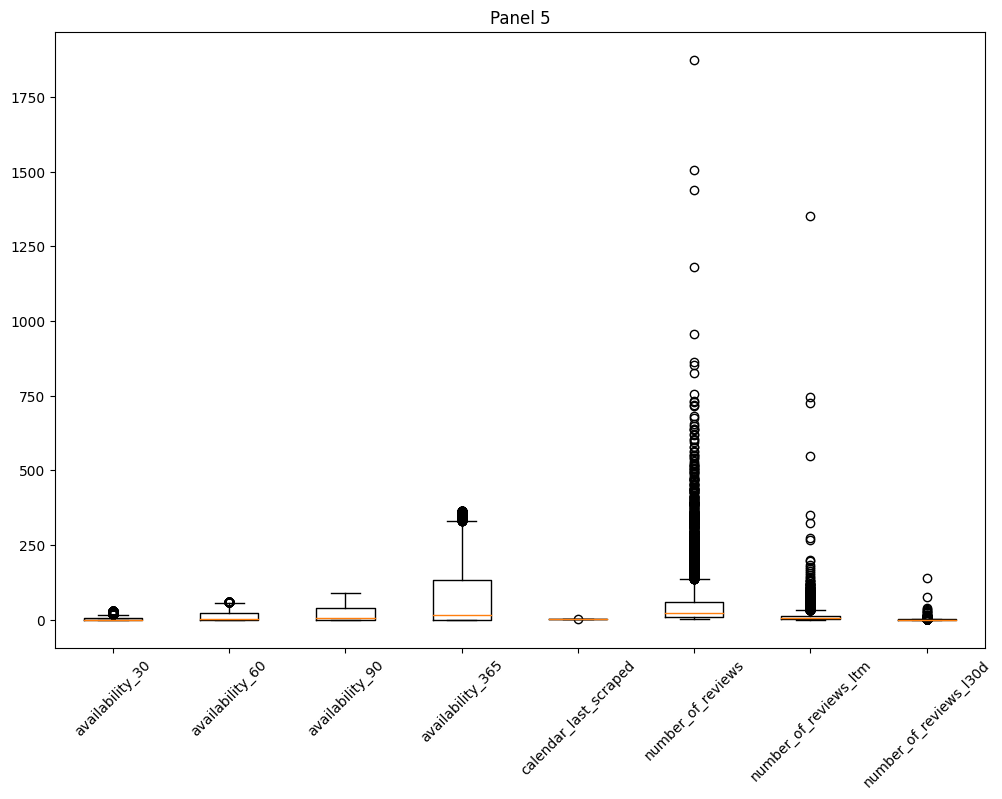

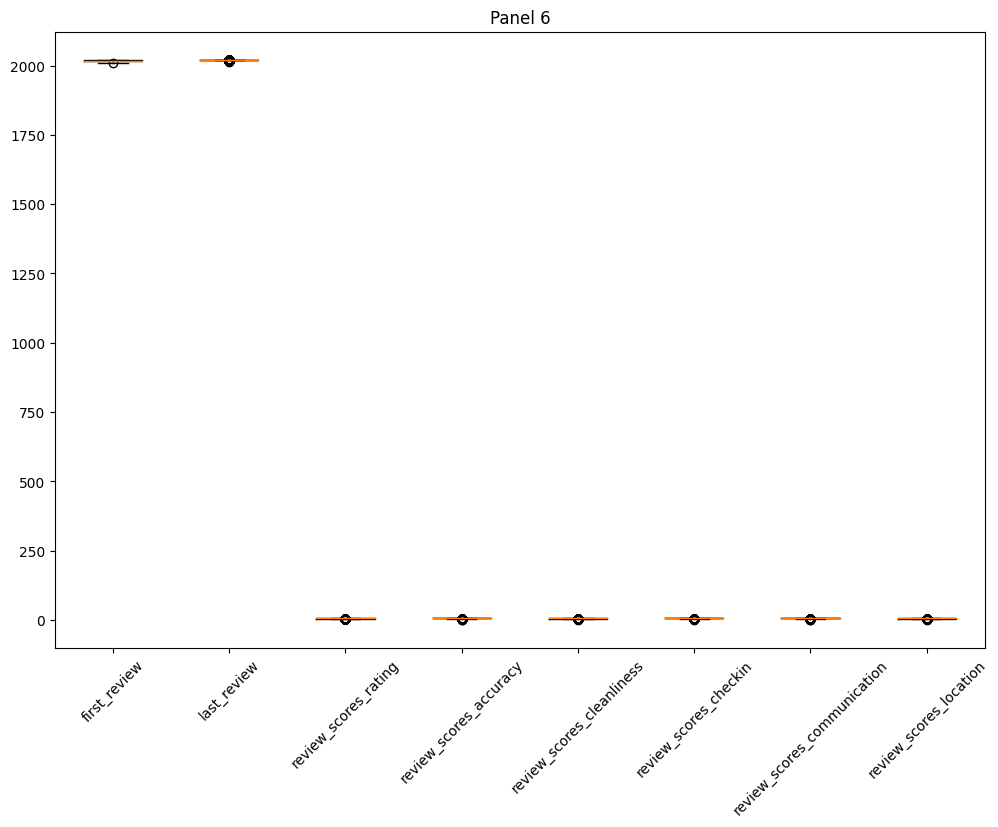

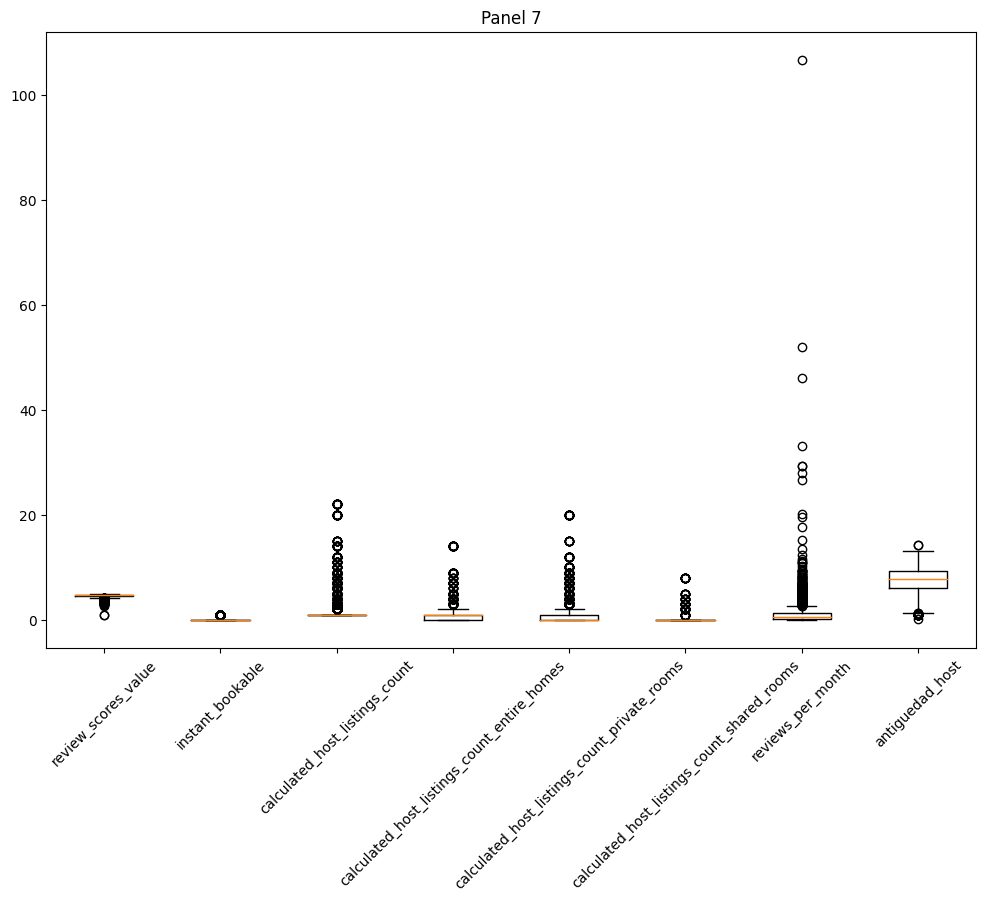

Se han mostrado 7 imágenes de boxplots.


In [189]:
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

num_paneles = len(columnas_numericas) // 9 + 1
grupos_columnas = np.array_split(columnas_numericas, num_paneles)

for i, grupo_col in enumerate(grupos_columnas):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.boxplot(df[grupo_col])
    ax.set_xticklabels(grupo_col, rotation=45)
    ax.set_title(f'Panel {i+1}')
    
    plt.show()
    plt.close(fig)  

print(f'Se han mostrado {num_paneles} imágenes de boxplots.')

In [90]:
for column in df:
    min_value = df[column].min()
    max_value = df[column].max()
    
    print(f"Columna: {column}")
    print(f"Valor mínimo: {min_value}")
    print(f"Valor máximo: {max_value}")
    print("------------------")

Columna: id
Valor mínimo: 2818
Valor máximo: 568514877303578111
------------------
Columna: source
Valor mínimo: 0
Valor máximo: 1
------------------
Columna: name
Valor mínimo: -0.75
Valor máximo: 1.0
------------------
Columna: description
Valor mínimo: 1
Valor máximo: 1000
------------------
Columna: neighborhood_overview
Valor mínimo: -0.5
Valor máximo: 1.0
------------------
Columna: host_id
Valor mínimo: 3159
Valor máximo: 486551220
------------------
Columna: host_location
Valor mínimo: 0
Valor máximo: 1
------------------
Columna: host_about
Valor mínimo: -0.8
Valor máximo: 1.0
------------------
Columna: host_response_time
Valor mínimo: 0
Valor máximo: 4
------------------
Columna: host_response_rate
Valor mínimo: 0.0
Valor máximo: 100.0
------------------
Columna: host_acceptance_rate
Valor mínimo: 0.0
Valor máximo: 100.0
------------------
Columna: host_is_superhost
Valor mínimo: 0
Valor máximo: 1
------------------
Columna: host_listings_count
Valor mínimo: 1
Valor máximo: 

Imputación de outliers

Columnas: minimum_maximum_nights, maximum_maximum_nights, maximum_nights_avg_ntm


In [91]:
#tienen un maximo con valor 2147483647 

# Verificar si el máximo de las tres columnas está en la misma fila
same_row = (df['minimum_maximum_nights'].idxmax() == df['maximum_maximum_nights'].idxmax() == df['maximum_nights_avg_ntm'].idxmax())

if same_row:
    print("El máximo de las tres columnas está en la misma fila")
else:
    print("El máximo de las tres columnas no está en la misma fila")

#al estar en la misma fila, consiero que es un error y borro la fila

max_index = df[['minimum_maximum_nights', 'maximum_maximum_nights', 'maximum_nights_avg_ntm']].idxmax().values[0]
df = df.drop(max_index)

El máximo de las tres columnas está en la misma fila


Columna price

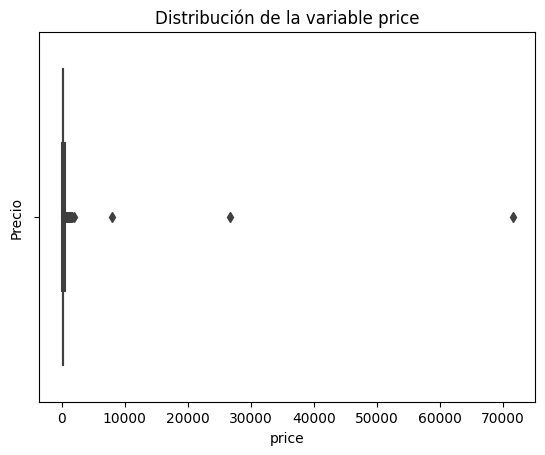

In [190]:
sns.boxplot(data=df, x='price')
plt.title('Distribución de la variable price')
plt.ylabel('Precio')
plt.show()

In [93]:
# Contar la cantidad de valores arriba de 10000 en la columna 'price'
cantidad_valores = (df['price'] > 10000).sum()
valores_arriba_10000 = df.loc[df['price'] > 10000, 'price']
print("Cantidad de valores arriba de 10000 en la columna 'price':", cantidad_valores)
print("Valores arriba de 10000 en la columna 'price':")
print(valores_arriba_10000)

#asumo que el valor de 71536 es un error asi que lo elimino
indice_max = df['price'].idxmax()

# Eliminar el valor más alto en la columna 'price'
df = df.drop(indice_max)

Cantidad de valores arriba de 10000 en la columna 'price': 2
Valores arriba de 10000 en la columna 'price':
785     26696.0
1126    71536.0
Name: price, dtype: float64


# Transformaciones en el dataset test

En este apartado se aplicaran los mismos cambios aplicados a la base train, en la base val

In [193]:
num_columnas_antes = len(dfval.columns)

columnas_a_eliminar = dfval.columns[dfval.isnull().all()]
print(columnas_a_eliminar)
#se eliminaron las columnas: 'neighbourhoof_group_cleansed', 'bathrooms', 'calendar_updated'

dfval = dfval.dropna(axis=1, how='all')
num_columnas_despues = len(dfval.columns)

num_columnas_eliminadas = num_columnas_antes - num_columnas_despues
print(f"Se eliminaron {num_columnas_eliminadas} columnas")
#se eliminaron 3 columnas

Index(['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated'], dtype='object')
Se eliminaron 3 columnas


In [194]:
dfval['source'] = dfval['source'].map({'city scrape': 0, 'previous scrape': 1})

<ipython-input-194-825879671b48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfval['source'] = dfval['source'].map({'city scrape': 0, 'previous scrape': 1})


In [195]:
dfval.dtypes['source']

valores_unicos = dfval['source'].unique()
print(valores_unicos)


[1 0]


In [196]:
from textblob import TextBlob

sentiment_scores = []
for value in dfval['name']:
    blob = TextBlob(str(value))
    sentiment_scores.append(blob.sentiment.polarity)

dfval['name'] = sentiment_scores
dfval['name'] = dfval['name'].astype(float)


In [197]:
print(dfval['description'].isnull().sum()) 
dfval['description'] = dfval['description'].fillna(0) 

dfval['description'] = dfval['description'].astype(str) 
dfval['description'] = dfval['description'].apply(len)

dfval['description'] = pd.to_numeric(dfval['description'])

1


In [198]:
cantidad_nulos = dfval['neighborhood_overview'].isnull().sum()
print(cantidad_nulos) 

dfval['neighborhood_overview'] = dfval['neighborhood_overview'].fillna(0)

#para analizar la descripcion del barrio, realizaré un analisis de sentimiento
sentimientos = dfval['neighborhood_overview'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
dfval['neighborhood_overview'] = sentimientos
dfval['neighborhood_overview'] = dfval['neighborhood_overview'].astype(float)

654


In [199]:
dfval['host_since'] = pd.to_datetime(dfval['host_since'])

print('Fecha mínima:', dfval['host_since'].min())
print('Fecha máxima:', dfval['host_since'].max())

# se considera la antiguedad desde el 1.1.2023
from datetime import datetime
fecha_actual = datetime(2023, 1, 1)

dfval['antiguedad_host'] = (fecha_actual - dfval['host_since']) / pd.Timedelta(days=365)

Fecha mínima: 2010-08-09 00:00:00
Fecha máxima: 2022-11-24 00:00:00


In [200]:
dfval = dfval.drop('host_since', axis=1)

In [201]:
cantidad_nulos = dfval['host_location'].isnull().sum()
print(cantidad_nulos) 

dfval['host_location'] = dfval['host_location'].astype(str) 

dfval['host_location'] = dfval['host_location'].fillna(0)

#considero que si el host esta en Holanda, la puntuacion sera mejor 
def contains_netherlands(text):
    if "Netherlands" in text:
        return 1
    else: 
       return 0

dfval['host_location'] = dfval['host_location'].apply(contains_netherlands)
dfval['host_location'] = dfval['host_location'].astype(int)


222


In [202]:
cantidad_nulos = dfval['host_about'].isnull().sum()
print(cantidad_nulos) 

dfval['host_about'] = dfval['host_about'].fillna(0) 

#realizo análisis de sentimiento
sentiment_scores1 = []

for value in dfval['host_about']:
    blob = TextBlob(str(value))
    sentiment_scores1.append(blob.sentiment.polarity)

dfval['host_about'] = sentiment_scores1
dfval['host_about'] = dfval['host_about'].astype(float)

664


In [203]:
cantidad_nulos = dfval['host_response_time'].isnull().sum()
print(cantidad_nulos) 

diccionario = {'within a day': 2, 'within an hour': 4, 'within a few hours': 3, 'a few days or more': 1, np.nan: 0}
dfval['host_response_time'] = dfval['host_response_time'].map(diccionario)
dfval['host_response_time'] = dfval['host_response_time'].astype(int)

201


In [204]:
cantidad_nulos = dfval['host_response_rate'].isnull().sum()
print(cantidad_nulos) 

moda = dfval['host_response_rate'].mode()[0]
dfval['host_response_rate'] = dfval['host_response_rate'].fillna(moda)

dfval['host_response_rate'] = dfval['host_response_rate'].str.replace('%', '').astype(float)

201


In [205]:
cantidad_nulos = dfval['host_acceptance_rate'].isnull().sum()
print(cantidad_nulos) 

moda = dfval['host_acceptance_rate'].mode()[0]
dfval['host_acceptance_rate'] = dfval['host_acceptance_rate'].fillna(moda)

dfval['host_acceptance_rate'] = dfval['host_acceptance_rate'].str.replace('%', '').astype(float)

40


In [206]:
dfval.dropna(subset=['host_is_superhost'], inplace=True)

def bool_to_int(x):
    if x == 't':
        return 1
    else:
        return 0

dfval['host_is_superhost'] = dfval['host_is_superhost'].apply(bool_to_int)
dfval['host_is_superhost'] = dfval['host_is_superhost'].astype(int)


In [207]:
def count_comma_words(text):
    return len(text.split(','))

dfval['host_verifications'] = dfval['host_verifications'].apply(count_comma_words)
dfval['host_verifications'] = dfval['host_verifications'].astype(int)



In [208]:
def bool_to_int(x):
    if x == 't':
        return 1
    else:
        return 0

dfval['host_has_profile_pic'] = dfval['host_has_profile_pic'].apply(bool_to_int)
dfval['host_has_profile_pic'] = dfval['host_has_profile_pic'].astype(int)

In [209]:
def bool_to_int(x):
    if x == 't':
        return 1
    else:
        return 0

dfval['host_identity_verified'] = dfval['host_identity_verified'].apply(bool_to_int)
dfval['host_identity_verified'] = dfval['host_identity_verified'].astype(int)


In [210]:
mapeo = {
    'Westerpark': 1,
    'Oostelijk Havengebied - Indische Buurt': 2,
    'Centrum-Oost': 3,
    'Centrum-West': 4,
    'Zuid': 5,
    'Oud-Oost': 6,
    'De Pijp - Rivierenbuurt': 7,
    'Slotervaart': 8,
    'De Baarsjes - Oud-West': 9,
    'Bos en Lommer': 10,
    'IJburg - Zeeburgereiland': 11,
    'Watergraafsmeer': 12,
    'Noord-Oost': 13,
    'Bijlmer-Centrum': 14,
    'Oud-Noord': 15,
    'Noord-West': 16,
    'De Aker - Nieuw Sloten': 17,
    'Geuzenveld - Slotermeer': 18,
    'Osdorp': 19,
    'Gaasperdam - Driemond': 20,
    'Bijlmer-Oost': 21,
    'Buitenveldert - Zuidas': 22
}

dfval['neighbourhood_cleansed'] = dfval['neighbourhood_cleansed'].map(mapeo)
dfval['neighbourhood_cleansed'] = dfval['neighbourhood_cleansed'].astype(int)


In [211]:
diccionario = {'Private room': 2, 'Entire home/apt': 4, 'Hotel room': 3, 'Shared room': 1}

dfval['room_type'] = dfval['room_type'].map(diccionario)
dfval['room_type'] = dfval['room_type'].astype(int)



In [212]:
#en una columna separo en privado y compartido (sin importar la cantidad) (1 es privado, 2 compartido)
#asumo que bath que no aclara es privado

import re

terminos_1 = ['shared baths', 'shared bath', 'shared half-bath']

regex_terminos_1 = r'\b({})\b'.format('|'.join(map(re.escape, terminos_1)))

dfval['bathrooms_text'] = np.where(dfval['bathrooms_text'].str.lower().str.strip().str.contains(regex_terminos_1), 2, 1)

dfval['bathrooms_text'] = dfval['bathrooms_text'].astype(int)


<ipython-input-212-c5f9dce9f64b>:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dfval['bathrooms_text'] = np.where(dfval['bathrooms_text'].str.lower().str.strip().str.contains(regex_terminos_1), 2, 1)


In [213]:
cantidad_nulos = dfval['bedrooms'].isnull().sum()
print(cantidad_nulos) 

bedrooms_mode = dfval['bedrooms'].mode()[0] 
dfval['bedrooms'] = dfval['bedrooms'].fillna(bedrooms_mode) 


28


In [214]:
cantidad_nulos = dfval['beds'].isnull().sum()
print(cantidad_nulos) 

beds_mode = dfval['beds'].mode()[0] 
dfval['beds'] = dfval['beds'].fillna(beds_mode) 

7


In [215]:
def count_comma_words(text):
    return len(text.split(','))

dfval['amenities'] = dfval['amenities'].apply(count_comma_words)
dfval['amenities'] = dfval['amenities'].astype(int)


In [216]:
dfval['price'] = dfval['price'].astype(str)

dfval['price'] = dfval['price'].str.replace('$', '')
dfval['price'] = dfval['price'].str.replace(',', '')

dfval['price'] = pd.to_numeric(dfval['price'])


<ipython-input-216-17f93acda2ce>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfval['price'] = dfval['price'].str.replace('$', '')


In [217]:
def bool_to_int(x):
    if x == 't':
        return 1
    else:
        return 0

dfval['has_availability'] = dfval['has_availability'].apply(bool_to_int)
dfval['has_availability'] = dfval['has_availability'].astype(int)


In [218]:
def convertir_valores(valor):
    if valor == '2022-12-05':
        return "1"
    elif valor == '2022-12-17':
        return "2"

dfval['calendar_last_scraped'] = dfval['calendar_last_scraped'].apply(convertir_valores)
dfval['calendar_last_scraped'] = dfval['calendar_last_scraped'].astype(str)

In [219]:
nulos = pd.to_numeric(dfval['calendar_last_scraped'], errors='coerce').isnull().sum()
print("Cantidad de valores nulos en la columna 1:", nulos) #1233
dfval['calendar_last_scraped'] = dfval['calendar_last_scraped'].fillna(0)

Cantidad de valores nulos en la columna 1: 0


In [220]:
dfval['calendar_last_scraped'] = dfval['calendar_last_scraped'].astype(str)
dfval['calendar_last_scraped'] = dfval['calendar_last_scraped'].astype(int)

In [221]:
from datetime import datetime
dfval['first_review'] = pd.to_datetime(dfval['first_review'])
dfval['first_review'] = dfval['first_review'].dt.year.astype(int)  

from datetime import datetime
dfval['last_review'] = pd.to_datetime(dfval['last_review'])
dfval['last_review'] = dfval['last_review'].dt.year.astype(int) 


In [222]:
filas_con_nulos = dfval.loc[dfval['review_scores_accuracy'].isnull()]

hay_nulos_en_otros_campos = filas_con_nulos[['review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location']].isnull().any(axis=1)

print(sum(hay_nulos_en_otros_campos))

dfval.dropna(subset=['review_scores_accuracy'], inplace=True)


0


In [223]:
dfval = dfval.drop('license', axis=1)

In [224]:
def bool_to_int(x):
    if x == 't':
        return 1
    else:
        return 0

dfval['instant_bookable'] = dfval['instant_bookable'].apply(bool_to_int)
dfval['instant_bookable'] = dfval['instant_bookable'].astype(int)



In [225]:
#host_name --> nombres de dueños
#considero que esta columna no aporta valor para el análisis asi que la elimino
dfval = dfval.drop('host_name', axis=1)

#host_neighbourhood --> barrio del dueño
#considero que este aspecto lo analizo previamente mediante si el dueño vive o no en Holanda
dfval = dfval.drop('host_neighbourhood', axis=1)

#property_type --> Tipo de propiedad, la selecciona el dueño cuando crea el anuncio 
#la columna room_type contiene una clasificación mas general, utilizo esa
dfval = dfval.drop('property_type', axis=1)

#neighbourhood --> lugar del alojamiento
#al ser detallada de neighbourhood_cleansed, no la utilizo
dfval = dfval.drop('neighbourhood', axis=1)


In [226]:
dfval.dtypes

id                                                int64
source                                            int64
name                                            float64
description                                       int64
neighborhood_overview                           float64
host_id                                           int64
host_location                                     int64
host_about                                      float64
host_response_time                                int64
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                 int64
host_listings_count                               int64
host_total_listings_count                         int64
host_verifications                                int64
host_has_profile_pic                              int64
host_identity_verified                            int64
neighbourhood_cleansed                          

In [227]:
null_counts = dfval.isnull().sum()
for column, count in null_counts.iteritems():
  print(f"Columna: {column}, Cantidad de nulos: {count}")

Columna: id, Cantidad de nulos: 0
Columna: source, Cantidad de nulos: 0
Columna: name, Cantidad de nulos: 0
Columna: description, Cantidad de nulos: 0
Columna: neighborhood_overview, Cantidad de nulos: 0
Columna: host_id, Cantidad de nulos: 0
Columna: host_location, Cantidad de nulos: 0
Columna: host_about, Cantidad de nulos: 0
Columna: host_response_time, Cantidad de nulos: 0
Columna: host_response_rate, Cantidad de nulos: 0
Columna: host_acceptance_rate, Cantidad de nulos: 0
Columna: host_is_superhost, Cantidad de nulos: 0
Columna: host_listings_count, Cantidad de nulos: 0
Columna: host_total_listings_count, Cantidad de nulos: 0
Columna: host_verifications, Cantidad de nulos: 0
Columna: host_has_profile_pic, Cantidad de nulos: 0
Columna: host_identity_verified, Cantidad de nulos: 0
Columna: neighbourhood_cleansed, Cantidad de nulos: 0
Columna: latitude, Cantidad de nulos: 0
Columna: longitude, Cantidad de nulos: 0
Columna: room_type, Cantidad de nulos: 0
Columna: accommodates, Cantid

<ipython-input-227-993c37435e22>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, count in null_counts.iteritems():


In [228]:
columnas = dfval.columns

for columna in columnas:
    maximo = dfval[columna].max()
    minimo = dfval[columna].min()
    print(f"Columna: {columna}")
    print(f"Máximo: {maximo}")
    print(f"Mínimo: {minimo}")
    print("\n")

Columna: id
Máximo: 770095562780998392
Mínimo: 538723


Columna: source
Máximo: 1
Mínimo: 0


Columna: name
Máximo: 1.0
Mínimo: -0.275


Columna: description
Máximo: 1000
Mínimo: 1


Columna: neighborhood_overview
Máximo: 1.0
Mínimo: -0.20000000000000004


Columna: host_id
Máximo: 488984558
Mínimo: 195859


Columna: host_location
Máximo: 1
Mínimo: 0


Columna: host_about
Máximo: 1.0
Mínimo: -0.225


Columna: host_response_time
Máximo: 4
Mínimo: 0


Columna: host_response_rate
Máximo: 100.0
Mínimo: 0.0


Columna: host_acceptance_rate
Máximo: 100.0
Mínimo: 0.0


Columna: host_is_superhost
Máximo: 1
Mínimo: 0


Columna: host_listings_count
Máximo: 68
Mínimo: 1


Columna: host_total_listings_count
Máximo: 249
Mínimo: 1


Columna: host_verifications
Máximo: 3
Mínimo: 1


Columna: host_has_profile_pic
Máximo: 1
Mínimo: 0


Columna: host_identity_verified
Máximo: 1
Mínimo: 0


Columna: neighbourhood_cleansed
Máximo: 22
Mínimo: 1


Columna: latitude
Máximo: 52.42461
Mínimo: 52.29261


Columna:

# Correlación

In [125]:
for column, dtype in df.dtypes.iteritems():
    print(f"Columna: {column}, Tipo de dato: {dtype}")

Columna: id, Tipo de dato: int64
Columna: source, Tipo de dato: int64
Columna: name, Tipo de dato: float64
Columna: description, Tipo de dato: int64
Columna: neighborhood_overview, Tipo de dato: float64
Columna: host_id, Tipo de dato: int64
Columna: host_location, Tipo de dato: int64
Columna: host_about, Tipo de dato: float64
Columna: host_response_time, Tipo de dato: int64
Columna: host_response_rate, Tipo de dato: float64
Columna: host_acceptance_rate, Tipo de dato: float64
Columna: host_is_superhost, Tipo de dato: int64
Columna: host_listings_count, Tipo de dato: int64
Columna: host_total_listings_count, Tipo de dato: int64
Columna: host_verifications, Tipo de dato: int64
Columna: host_has_profile_pic, Tipo de dato: int64
Columna: host_identity_verified, Tipo de dato: int64
Columna: neighbourhood_cleansed, Tipo de dato: int64
Columna: latitude, Tipo de dato: float64
Columna: longitude, Tipo de dato: float64
Columna: room_type, Tipo de dato: int64
Columna: accommodates, Tipo de dato:

<ipython-input-125-8faeff90dcfe>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, dtype in df.dtypes.iteritems():


In [126]:
df.corr()

id    source      name  \
id                                            1.000000 -0.044942  0.003938   
source                                       -0.044942  1.000000  0.105122   
name                                          0.003938  0.105122  1.000000   
description                                  -0.071538 -0.031450  0.021099   
neighborhood_overview                        -0.039287  0.039515  0.066354   
host_id                                       0.050933 -0.139021 -0.123011   
host_location                                -0.040200  0.067920  0.060466   
host_about                                   -0.031760 -0.019610  0.051240   
host_response_time                            0.012413 -0.581264 -0.114766   
host_response_rate                            0.022933 -0.590090 -0.096459   
host_acceptance_rate                          0.022536 -0.379235 -0.112552   
host_is_superhost                            -0.028610 -0.252014 -0.077936   
host_listings_count                          -0.005873 -0.077381 -0.037170   
host_total_listings_count                    -0.006078 -0.065004 -0.008223   
host_verifications                           -0.010451  0.030569  0.002222   
host_has_profile_pic                          0.004328  0.011029  0.002051   
host_identity_verified                        0.004209 -0.148246 -0.059435   
neighbourhood_cleansed                        0.009778  0.014190  0.006888   
latitude                                      0.002951 -0.006260 -0.054805   
longitude                                     0.009076 -0.046018 -0.024529   
room_type                                     0.013855  0.315467  0.157538   
accommodates                                 -0.006011 -0.016104  0.012208   
bathrooms_text                                0.001036 -0.079388 -0.048519   
bedrooms                                      0.009875  0.061153  0.031663   
beds                                         -0.009857 -0.030290 -0.015919   
amenities                                     0.017237 -0.059196  0.030362   
price                                         0.013670 -0.046743  0.002583   
minimum_nights                               -0.004725  0.046977  0.007331   
maximum_nights                               -0.062447 -0.047542 -0.007007   
minimum_minimum_nights                       -0.004629  0.050028  0.007602   
maximum_minimum_nights                       -0.005733  0.037996  0.006545   
minimum_maximum_nights                       -0.050257 -0.026953  0.000660   
maximum_maximum_nights                       -0.053186 -0.061837 -0.019930   
minimum_nights_avg_ntm                       -0.005088  0.044458  0.008921   
maximum_nights_avg_ntm                       -0.051175 -0.050462 -0.010543   
has_availability                             -0.025825 -0.060503  0.025149   
availability_30                               0.040500 -0.485548 -0.091109   
availability_60                               0.024234 -0.566457 -0.105263   
availability_90                               0.022562 -0.584002 -0.109610   
availability_365                              0.006007 -0.549795 -0.127619   
calendar_last_scraped                        -0.001529 -0.011229 -0.010292   
number_of_reviews                            -0.049070 -0.240812 -0.075324   
number_of_reviews_ltm                        -0.006403 -0.239003 -0.096827   
number_of_reviews_l30d                       -0.003896 -0.215981 -0.075528   
first_review                                  0.166603 -0.084800 -0.058575   
last_review                                   0.051744 -0.374058 -0.071631   
review_scores_rating                          0.012200  0.117378  0.072541   
review_scores_accuracy                        0.006099  0.110251  0.071533   
review_scores_cleanliness                     0.018793  0.029109  0.027648   
review_scores_checkin                        -0.000326  0.086463  0.034936   
review_scores_communication                   0.007499  0.123559  0.064062

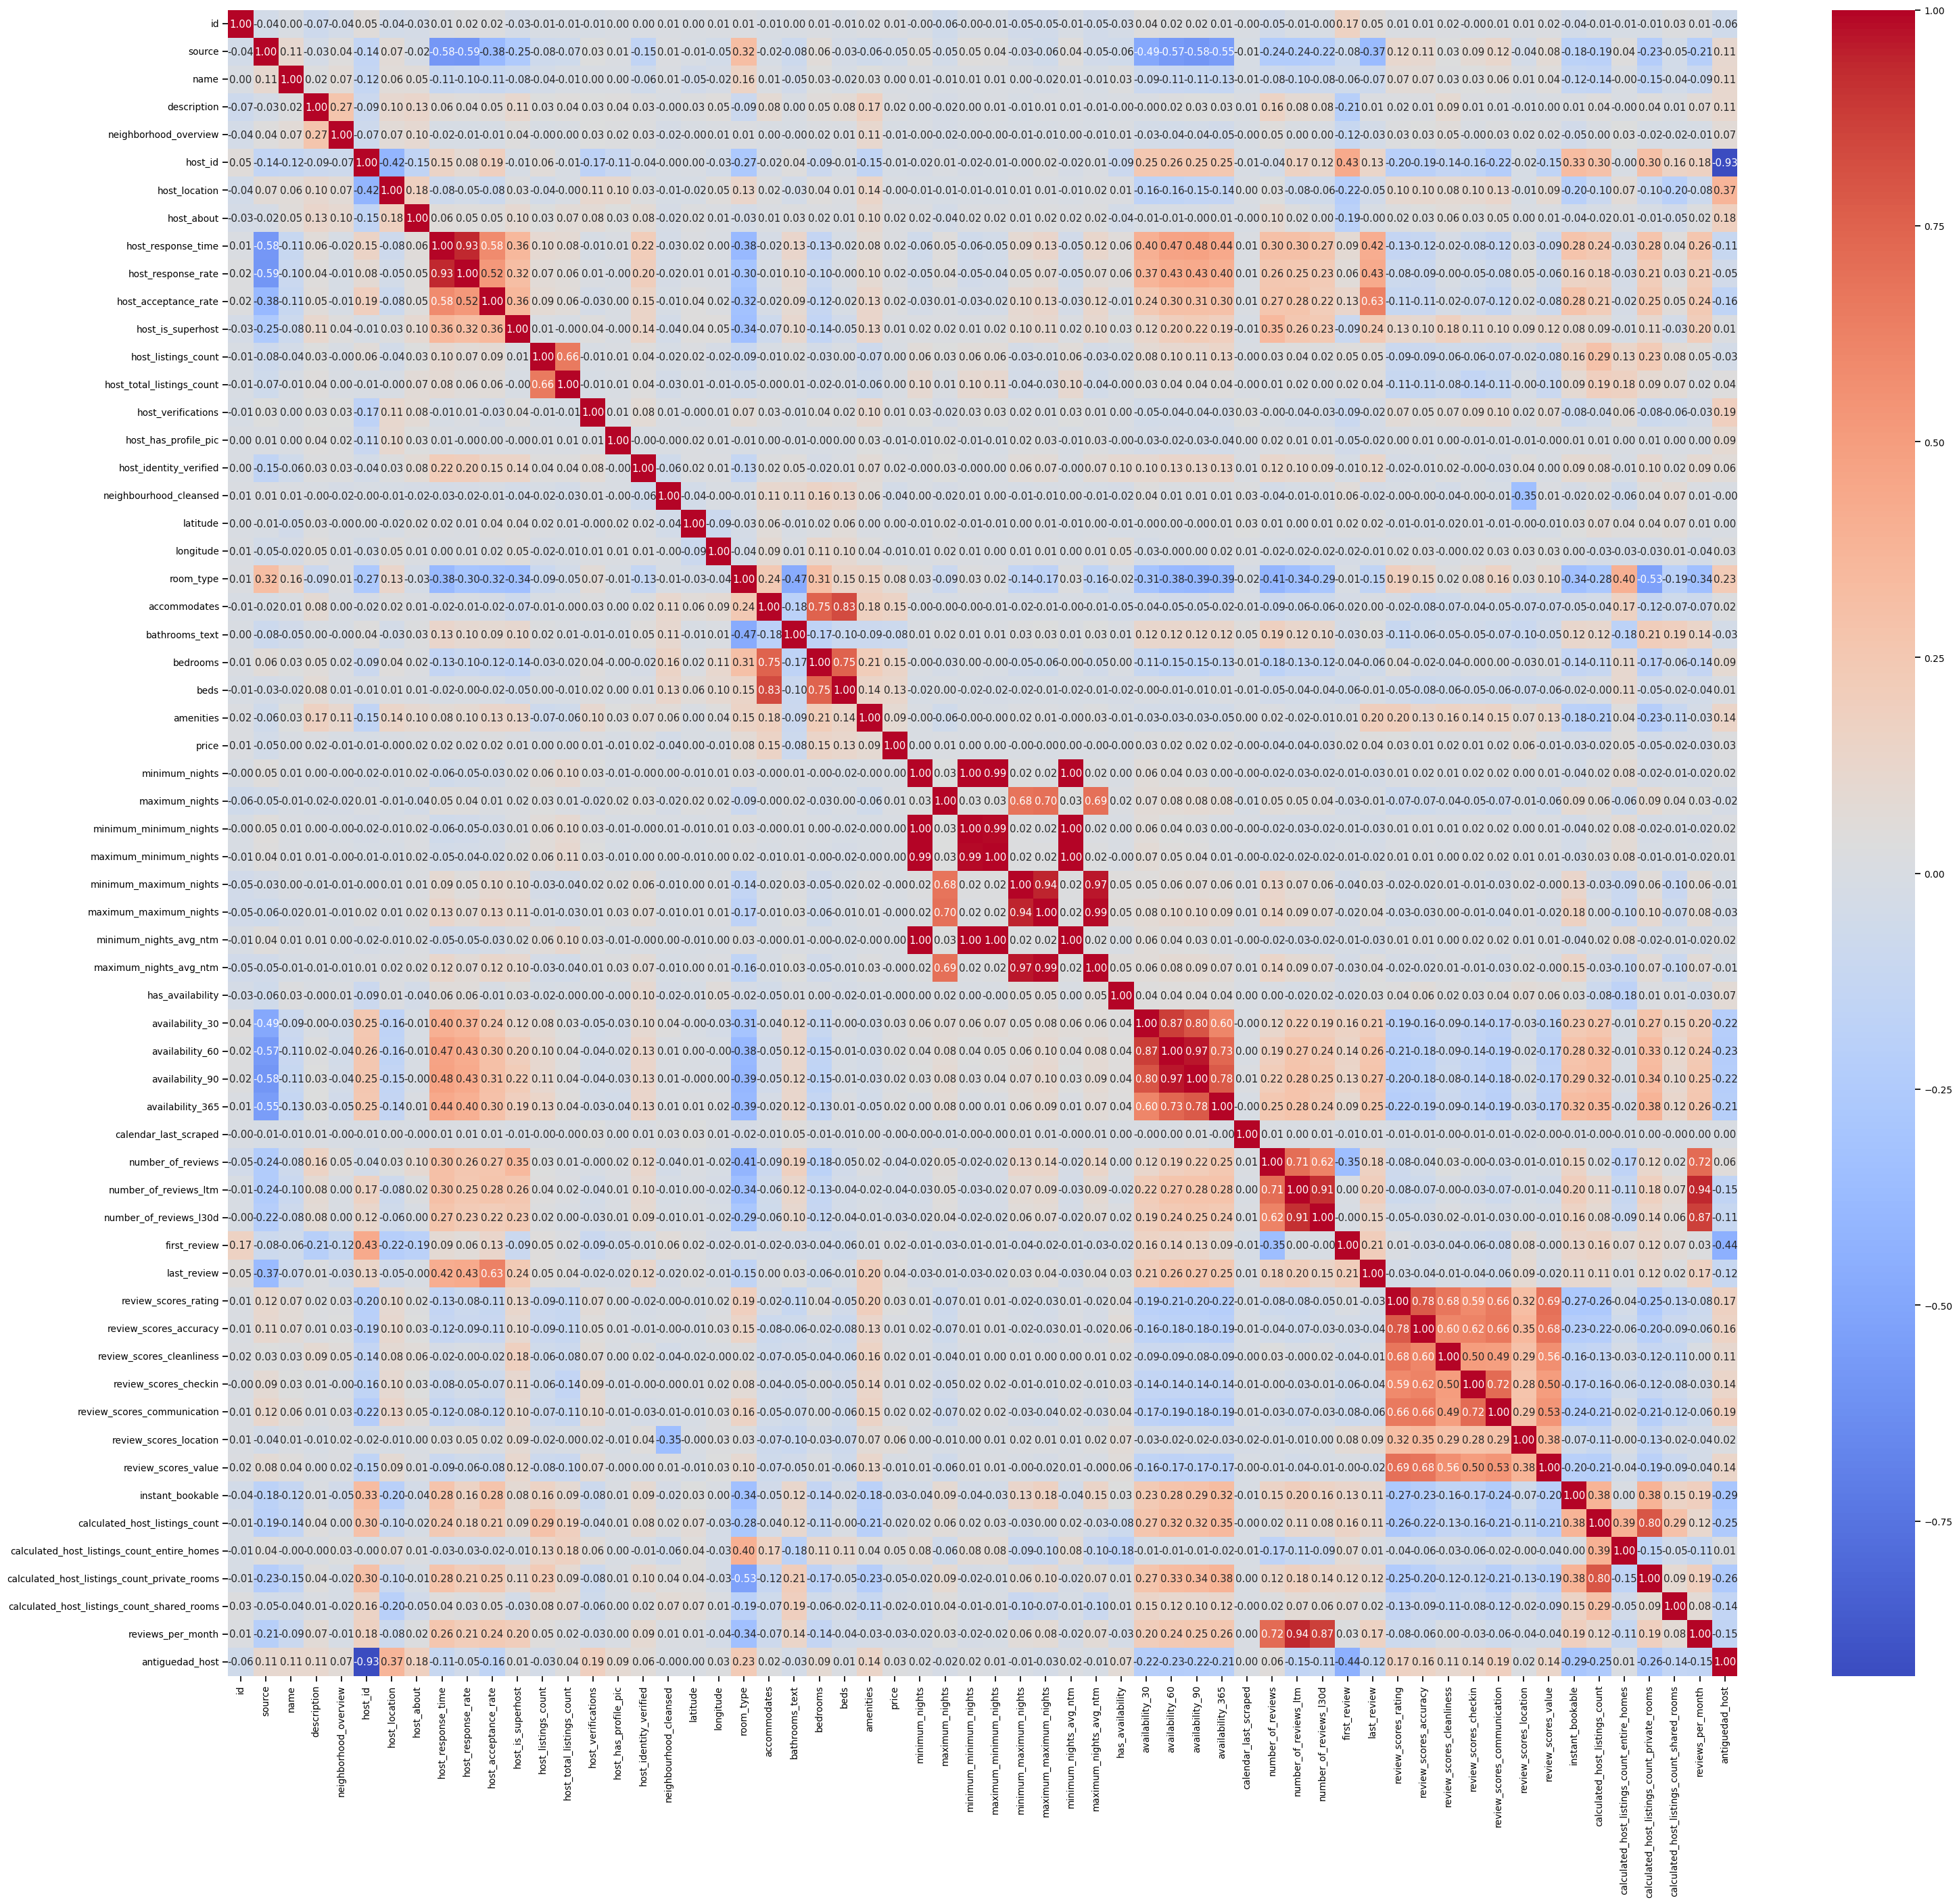

In [127]:
sns.set_context('notebook', font_scale=0.9)
fig, ax = plt.subplots(figsize=(36,32))
sns.heatmap(ax = ax, data = df.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

plt.show()

#División train y test

División train y test 

In [229]:
from sklearn.model_selection import train_test_split

columnas = ['id', 'source', 'name', 'description', 'neighborhood_overview',
       'host_id', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'antiguedad_host']

X = df[columnas]
y = df['review_scores_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 21)

In [230]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4184, 59)
(739, 59)
(4184,)
(739,)


# Linear Regression

REGRESIÓN MÚLTIPLE UTILIZANDO 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication'

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_new = X_test[['review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', ]]
X = X_train[['review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', ]]
y = y_train

reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X_new)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación R cuadrado:", r2) 

Coeficiente de determinación R cuadrado: 0.7184405954124438


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
X_new = dfval[['review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', ]]
reg = LinearRegression()

df['review_scores_cleanliness'].fillna(0, inplace=True)
df['review_scores_checkin'].fillna(0, inplace=True)
df['review_scores_communication'].fillna(0, inplace=True)

X = df[['review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', ]]
y = df['review_scores_rating']
reg.fit(X, y)

y_pred = reg.predict(X_new)
print(y_pred)
X_new['review_scores_rating'] = y_pred
nuevo_df = pd.DataFrame({'id': dfval.loc[:, 'id'], 'review_scores_rating': X_new.loc[:, 'review_scores_rating']})

print(nuevo_df)
nuevo_df.to_csv('RM3Mayo2.csv', index=False) 

Regresión múltiple utilizando: columnas numéricas (todas)

In [132]:
columnas_numericas = df.select_dtypes(include=np.number).columns.tolist()
print(columnas_numericas)

columns_with_nulls = df.columns[df.isnull().any()]
print(columns_with_nulls)

['id', 'source', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_comm

In [133]:
columns_with_nulls = dfval.columns[dfval.isnull().any()]
print(columns_with_nulls)

Index([], dtype='object')


In [ ]:
columns = ['id', 'source', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'antiguedad_host']

for column in columns:
    print(f"Columna: {column}, Tipo de dato: {dfval[column].dtype}")


In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_new = X_test[ ['source', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'antiguedad_host']
]
X = X_train[ ['source', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'antiguedad_host']
]

y = y_train

reg = LinearRegression()

reg.fit(X, y)
y_pred = reg.predict(X_new)

r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación R cuadrado:", r2) 

Coeficiente de determinación R cuadrado: 0.7916842178450367


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

X_new = dfval[[ 'name', 'description', 'neighborhood_overview', 
               'host_id', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 
               'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 
               'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 
                'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 
               'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 
               'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
               'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 
               'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 
               'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
               'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 
               'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
               'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 
               'reviews_per_month', 'antiguedad_host']]
reg = LinearRegression()
X = X_train[['name', 'description', 'neighborhood_overview', 
               'host_id', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 
               'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 
               'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'room_type', 
               'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 
               'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 
               'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
               'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 
               'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 
               'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
               'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 
               'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
               'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 
               'reviews_per_month', 'antiguedad_host']]
y = df['review_scores_rating']
reg.fit(X, y_train)

y_pred = reg.predict(X_new)
print(y_pred)

X_new['review_scores_rating'] = y_pred
nuevo_df = pd.DataFrame({'id': dfval.loc[:, 'id'], 'review_scores_rating': X_new.loc[:, 'review_scores_rating']})
print(nuevo_df)
nuevo_df.to_csv('RMCompleto16-05.csv', index=False) 

# Decision Tree Regressor

Decision tree regressor con parametros por default 

In [137]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X_new = X_test[ ['source', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'antiguedad_host']
]
X = X_train[ ['source', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'antiguedad_host']
]

y = y_train


model = DecisionTreeRegressor()
model.fit(X, y)
y_pred = model.predict(X_new)

r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación R cuadrado:", r2) 

Coeficiente de determinación R cuadrado: 0.5557442163302914


In [138]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

columnas = ['source', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_location',
            'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate',
            'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
            'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
            'neighbourhood_cleansed', 'room_type', 'accommodates', 'bathrooms_text',
            'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
            'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
            'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
            'has_availability', 'availability_30', 'availability_60', 'availability_90',
            'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
            'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
            'review_scores_communication', 'review_scores_location', 'review_scores_value',
            'instant_bookable', 'calculated_host_listings_count',
            'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
            'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'antiguedad_host']
df_columnas = df[columnas].copy()


model = DecisionTreeRegressor()
model.fit(X_train[columnas], y_train)
y_pred = model.predict(dfval[columnas])

dfval['review_scores_rating'] = y_pred
dfval['listing_id'] = dfval['id']
dfval[['id', 'review_scores_rating']].to_csv('DTR16-05.csv', index=False)

Decision Tree Regressor con Grid Search

In [139]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [140]:
X_t = X_train[columnas]
y_t = y_train

In [141]:
parameters = [{'max_depth': [5, 10, 20], 'max_features': [2, 5], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [2, 5, 10]}]
a = DecisionTreeRegressor(random_state=0)
grid = GridSearchCV(a, parameters)

In [142]:
grid.fit(X_t, y_t)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid=[{'max_depth': [5, 10, 20], 'max_features': [2, 5],
                          'min_samples_leaf': [1, 3, 5],
                          'min_samples_split': [2, 5, 10]}])

In [143]:
grid.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [144]:
modelo = DecisionTreeRegressor(max_depth = 10, max_features = 5, min_samples_leaf = 3, min_samples_split = 2)  

In [145]:
X_new = X_test [columnas]
X = X_train[columnas]

y = y_train

modelo = DecisionTreeRegressor(max_depth = 10, max_features = 5, min_samples_leaf = 3, min_samples_split = 2)  
model.fit(X, y)
y_pred = model.predict(X_new)

r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación R cuadrado:", r2) 

Coeficiente de determinación R cuadrado: 0.5807205146789217


In [146]:
X_val = dfval[columnas]

modelo.fit(X_t, y_t)
modelo.score(X_t,y_t)
y_pred = modelo.predict(X_val)

dfval['review_scores_rating'] = y_pred
dfval['listing_id'] = dfval['id']
dfval[['id', 'review_scores_rating']].to_csv('DTR2_21-05.csv', index=False)

DECISION TREE REGRESSOR con grid search

In [147]:
X_new = X_test[columnas]
X = X_train[columnas]

y = y_train

In [148]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6]
}

model = DecisionTreeRegressor(random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = DecisionTreeRegressor(random_state=0, **best_params)

Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best Score: 0.6161710942285588


In [149]:
best_model.fit(X, y)
y_pred = best_model.predict(X_new)

r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación R cuadrado:", r2) 

Coeficiente de determinación R cuadrado: 0.6372900139048504


In [150]:
best_model.fit(X, y)
predictions = best_model.predict(dfval[columnas])

results_df = pd.DataFrame({'id': dfval['id'], 'review_scores_rating': predictions})
results_df.to_csv('DTR23-5.csv', index=False)

#Random forest

In [151]:
X_new = X_test [columnas]
X = X_train[columnas]

y = y_train

In [152]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 3],
    'n_estimators': [100, 200, 300]
}

model = RandomForestRegressor(random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 100}
Best Score: 0.7251690025101302


In [153]:
y_pred = grid_search.predict(X_new)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación R cuadrado:", r2) 

Coeficiente de determinación R cuadrado: 0.7088058617940277


In [154]:
y_pred = grid_search.predict(dfval[columnas])
predictions_df = pd.DataFrame({'id': dfval['id'], 'review_scores_rating': y_pred})
predictions_df.to_csv('RF_22-05.csv', index=False)

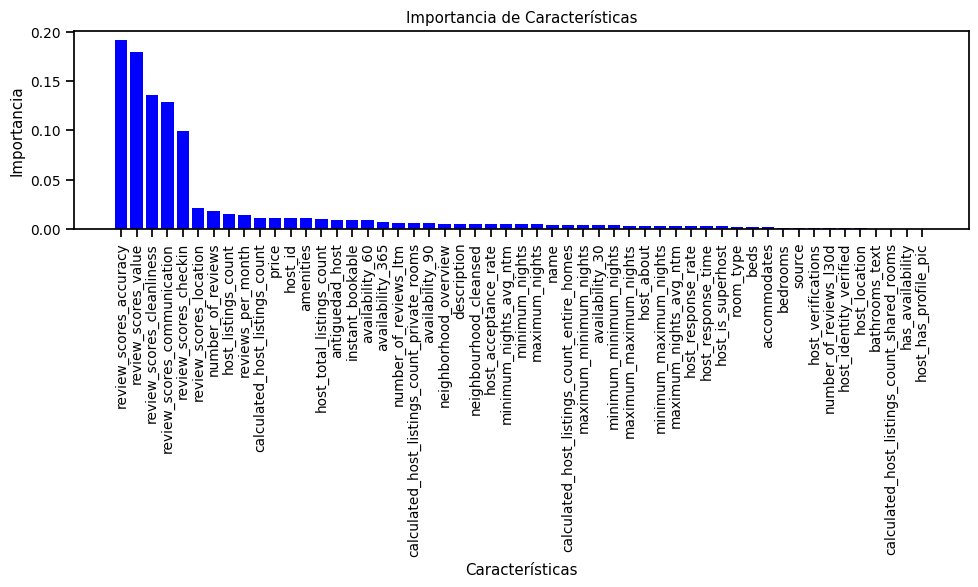

In [155]:
best_model = grid_search.best_estimator_

importances = best_model.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importancia de Características")
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.tight_layout()
plt.show()

In [156]:
selected_features = feature_names[indices][importances[indices] > 0]
X_selected = X[selected_features]
y_pred_test = best_model.predict(X_new)

r2_test = r2_score(y_test, y_pred_test)
print("Coeficiente de determinación R cuadrado en datos de prueba:", r2_test) 

Coeficiente de determinación R cuadrado en datos de prueba: 0.7088058617940277


In [157]:
model = RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt', min_samples_leaf=2, n_estimators=400)
model.fit(X, y)

y_pred = model.predict(X_new)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación R cuadrado:", r2) 

Coeficiente de determinación R cuadrado: 0.7166816194939214


In [158]:
y_pred = model.predict(dfval[columnas])
predictions_df = pd.DataFrame({'id': dfval['id'], 'review_scores_rating': y_pred})
predictions_df.to_csv('RF_1-06.csv', index=False)

# Modelo XGBoost

Modelo XGBoost con GridSearch

In [159]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

X_new = X_test [columnas]
X = X_train[columnas]
y = y_train

param_grid = {
    'nthread': [4],  # Número de hilos para el procesamiento paralelo
    'objective': ['reg:squarederror'],  # Función objetivo para regresión
    'learning_rate': [0.1, 0.01],  # Tasa de aprendizaje
    'max_depth': [3, 5, 7],  # Máxima profundidad del árbol
    'min_child_weight': [1, 3, 5],  # Peso mínimo de un nodo hoja
    'silent': [1],  # Imprimir mensajes durante el entrenamiento
    'subsample': [0.8],  # Submuestreo de las muestras
    'colsample_bytree': [0.8],  # Submuestreo de las columnas
    'n_estimators': [100, 200, 300]  # Número de estimadores (árboles) en el modelo
}

model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

best_params = grid_search.best_params_
print("Mejores parámetros encontrados:")
print(grid_search.best_params_) 

best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X, y)
y_pred = best_model.predict(X_new)

r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación R cuadrado:", r2)

[22:38:22] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[22:38:22] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[22:38:23] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[22:38:23] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[22:38:24] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[22:38:25] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[22:38:26] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[22:38:27] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[22:38:28] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[22:38:29] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[22:38:30] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[22:38:33] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not

In [160]:
y_pred = grid_search.predict(dfval[columnas])
predictions_df = pd.DataFrame({'id': dfval['id'], 'review_scores_rating': y_pred})
predictions_df.to_csv('XGB_23-05.csv', index=False)

Modelo XGBoost con GridSearch (otros hiperparametros)

In [161]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

X_new = X_test [columnas]
X = X_train[columnas]
y = y_train

param_grid = {
    'nthread': [4], 
    'objective': ['reg:squarederror'], 
    'learning_rate': [0.1, 0.05],  
    'max_depth': [2, 3, 5], 
    'min_child_weight': [5, 7, 9], 
    'silent': [1], 
    'subsample': [0.8], 
    'colsample_bytree': [0.8], 
    'n_estimators': [100, 200, 300]  
}

model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

best_params = grid_search.best_params_
print("Mejores parámetros encontrados:") 
print(grid_search.best_params_) 

best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X, y)
y_pred = best_model.predict(X_new)

r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación R cuadrado:", r2)

[22:48:19] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[22:48:19] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[22:48:20] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[22:48:20] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[22:48:21] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[22:48:21] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[22:48:22] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[22:48:23] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[22:48:24] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[22:48:24] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[22:48:26] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[22:48:28] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not

In [162]:
y_pred = grid_search.predict(dfval[columnas])
predictions_df = pd.DataFrame({'id': dfval['id'], 'review_scores_rating': y_pred})
predictions_df.to_csv('XGB_29-05.csv', index=False) 

In [234]:
X_new = X_test [columnas]
X = X_train[columnas]
y = y_train

model = xgb.XGBRegressor(colsample_bytree=0.8, learning_rate=0.05, max_depth=2, 
                         min_child_weight=9, n_estimators=200, nthread=4, objective='reg:squarederror', silent=1, subsample=0.8)
model.fit(X, y)
y_pred = model.predict(X_new)

r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación R cuadrado:", r2) 

[18:34:00] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Coeficiente de determinación R cuadrado: 0.7437185147947476


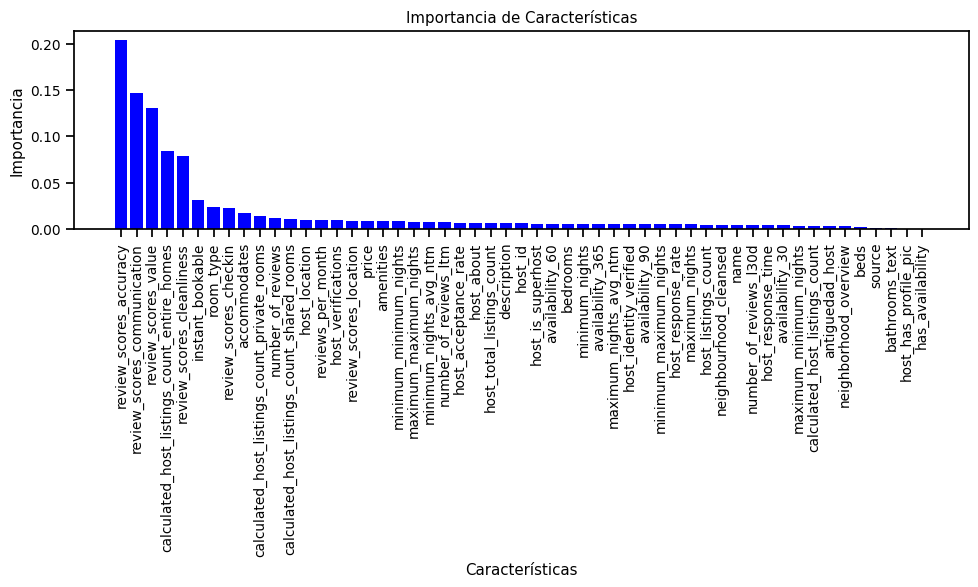

In [165]:
# Obtener la importancia de las características
importances = model.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importancia de Características")
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.tight_layout()
plt.show()

In [166]:
zero_importance_features = [feature for feature, importance in zip(X.columns, importance) if importance == 0]

X_train_filtered = X.drop(zero_importance_features, axis=1)
X_test_filtered = X_new.drop(zero_importance_features, axis=1)


In [167]:
model = xgb.XGBRegressor(colsample_bytree=0.8, learning_rate=0.05, max_depth=2, min_child_weight=9, 
                         n_estimators=200, nthread=4, objective='reg:squarederror', silent=1, subsample=0.8)
model.fit(X_train_filtered, y)
y_pred = model.predict(X_test_filtered)

r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación R cuadrado:", r2) 


[22:58:36] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Coeficiente de determinación R cuadrado: 0.7370321356141848


In [168]:
y_pred = grid_search.predict(dfval[columnas])

predictions_df = pd.DataFrame({'id': dfval['id'], 'review_scores_rating': y_pred})
predictions_df.to_csv('XGB_IF_29-05.csv', index=False) 

In [232]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from xgboost import plot_importance
import matplotlib.pyplot as plt

X_new = X_test [columnas]
X = X_train[columnas]
y = y_train

model = xgb.XGBRegressor(colsample_bytree=0.8, learning_rate=0.05, max_depth=2, 
                         min_child_weight=10, n_estimators=300, nthread=4, objective='reg:squarederror', silent=1, subsample=0.8)
model.fit(X, y)
y_pred = model.predict(X_new)

r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación R cuadrado:", r2) 

[18:33:31] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Coeficiente de determinación R cuadrado: 0.7482800142550262


In [170]:
y_pred = model.predict(dfval[columnas])
predictions_df = pd.DataFrame({'id': dfval['id'], 'review_scores_rating': y_pred})
predictions_df.to_csv('XGB1-06.csv', index=False) #0,726 en kaggle

In [171]:
X_new = X_test [columnas]
X = X_train[columnas]
y = y_train

model = xgb.XGBRegressor(colsample_bytree=0.85, learning_rate=0.07, max_depth=2, 
                         min_child_weight=9, n_estimators=200, nthread=4, objective='reg:squarederror', silent=1, subsample=0.8)


model.fit(X, y)
y_pred = model.predict(X_new)

r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación R cuadrado:", r2) 

[22:59:09] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Coeficiente de determinación R cuadrado: 0.7378077460432497


# Catboost

In [ ]:
!pip install catboost

In [174]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

X_new = X_test[columnas]
X = X_train[columnas]
y = y_train

In [175]:
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [0.1, 0.5, 1]}

model = CatBoostRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Mejores parámetros:", best_params)
print("Mejor puntaje en el conjunto de prueba:", grid_search.best_score_)

CB = best_model.fit(X, y)
y_pred = best_model.predict(X_new)

r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R2) en el conjunto de prueba:", r2) 

Se truncaron las últimas líneas 5000 del resultado de transmisión.
203:	learn: 0.1976096	total: 2.16s	remaining: 1.02s
204:	learn: 0.1975008	total: 2.18s	remaining: 1.01s
205:	learn: 0.1973933	total: 2.19s	remaining: 998ms
206:	learn: 0.1972734	total: 2.2s	remaining: 987ms
207:	learn: 0.1971566	total: 2.21s	remaining: 976ms
208:	learn: 0.1970368	total: 2.22s	remaining: 965ms
209:	learn: 0.1969286	total: 2.23s	remaining: 958ms
210:	learn: 0.1968131	total: 2.24s	remaining: 947ms
211:	learn: 0.1966955	total: 2.25s	remaining: 936ms
212:	learn: 0.1965817	total: 2.26s	remaining: 924ms
213:	learn: 0.1964697	total: 2.27s	remaining: 913ms
214:	learn: 0.1963585	total: 2.28s	remaining: 902ms
215:	learn: 0.1962400	total: 2.29s	remaining: 891ms
216:	learn: 0.1961241	total: 2.3s	remaining: 880ms
217:	learn: 0.1960079	total: 2.31s	remaining: 869ms
218:	learn: 0.1958961	total: 2.32s	remaining: 858ms
219:	learn: 0.1957955	total: 2.33s	remaining: 847ms
220:	learn: 0.1956788	total: 2.34s	remaining: 836ms

In [ ]:
model = CatBoostRegressor(depth=5, iterations=300, l2_leaf_reg=1, learning_rate=0.1)
model.fit(X, y)
y_pred = model.predict(X_new)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R2) en el conjunto de prueba:", r2) 

In [183]:
predictions = model.predict(dfval[columnas])
predictions_df = pd.DataFrame({'id': dfval['id'], 'review_scores_rating': predictions})
predictions_df.to_csv('CB1_1-06.csv', index=False) 

# Light Gradient Boosting Machine

In [ ]:
! pip install lightgbm
from lightgbm import LGBMRegressor

In [185]:
X_new = X_test [columnas]
X = X_train[columnas]
y = y_train

In [186]:
lgbm = LGBMRegressor(boosting_type='dart', max_depth=10, learning_rate = 0.2, num_iterations = 5000, num_leaves = 60)
lgbm.fit(X, y)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


LGBMRegressor(boosting_type='dart', learning_rate=0.2, max_depth=10,
              num_iterations=5000, num_leaves=60)

In [187]:
lgbm.score(X_new, y_test) 

0.7450737862402965

In [188]:
predictions = lgbm.predict(dfval[columnas])
predictions_df = pd.DataFrame({'id': dfval['id'], 'review_scores_rating': predictions})
predictions_df.to_csv('LGBM_29-05.csv', index=False) 

In [ ]:
feature_importances = lgbm.feature_importances_

df_feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
df_feature_importances = df_feature_importances.sort_values('Importance', ascending=False)

print(df_feature_importances)


In [190]:
X_filtered = X.drop(df_feature_importances[df_feature_importances['Importance'] == 0]['Feature'], axis=1)
X_test_filtered = X_new.drop(df_feature_importances[df_feature_importances['Importance'] == 0]['Feature'], axis=1)

In [191]:
lgbm = LGBMRegressor(boosting_type='dart', max_depth=10, learning_rate = 0.2, num_iterations = 5000, num_leaves = 60)
lgbm.fit(X_filtered, y)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


LGBMRegressor(boosting_type='dart', learning_rate=0.2, max_depth=10,
              num_iterations=5000, num_leaves=60)

In [192]:
y_pred = lgbm.predict(X_test_filtered)

r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación R cuadrado:", r2) 


Coeficiente de determinación R cuadrado: 0.7450737862402965


In [193]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

X_new = X_test [columnas]
X = X_train[columnas]
y = y_train

In [194]:
lgb = LGBMRegressor(boosting_type='dart', max_depth=10, 
                    learning_rate = 0.1, num_iterations = 3000, num_leaves = 60)

In [195]:
lgb.fit(X, y)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


LGBMRegressor(boosting_type='dart', max_depth=10, num_iterations=3000,
              num_leaves=60)

In [196]:
y_pred = lgb.predict(X_new)

r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación R cuadrado:", r2) 

Coeficiente de determinación R cuadrado: 0.745655865308574


# Modelo ganador
Modelo XGBoost: con un score de 67%

El modelo desarrollado se encuentra en la sección correspondiente al mismo 